<a href="https://colab.research.google.com/github/AmberLee2427/minicourses/blob/main/chapter5/Chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<style>
body, h1, h2, h3, h4, h5, h6, p, div, span {
    font-family: "Helvetica Neue", Helvetica, Arial, sans-serif !important;
}
</style>

# <font face="Helvetica" size="7">Chapter 5: Mini Data Challenge</font>  

<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">

<i> Authors: Amber Malpas, Katarzyna Kruszyńska, Somayeh Khakpash, Ali Crisp </i>

<br>

If you would like an introduction to python notebooks, please read this tutorial: https://medium.com/codingthesmartway-com-blog/getting-started-with-jupyter-notebook-for-python-4e7082bd5d46

Please note, you must **save this notebook in a space owned by you** (a GitHub repo, gist, to Google Drive, or locally) if you want to come back to it later without losing your progress. You can edit and run this notebook on Colab, but it **will not auto save** for you.


In [ ]:
yaml = '''name: minicourse
channels:
  - conda-forge
dependencies:
  - python=3.11
  - numpy
  - matplotlib
  - pandas
  - scipy
  - astropy
  - jupyter
  - pip
  - pip:
      - MulensModel'''

# save the yaml
with open('environment.yml', 'w') as f:
    f.write(yaml)

<!--
## <font face="Helvetica" size="6"> Dev Notes </font>
<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">
-->



<!-- ### <font face="Helvetica" size="5"> Overview </font>

The current plan is to give the students a miniature "season" of data to fit (as in a couple hundred lightcurves), and an example of how to fit a whole season in a notebook. This example will be using pyLiMA for the model fitting. If we are using Mulens Model we will probably just have to pretend that the observatory is on Earth.

The data will be the same set that the C4 data come from.

The notebook should probably include a pyLiMASS example.

### <font face="Helvetica" size="5"> Links to Content </font>

https://lsu.app.box.com/s/qx440yp9ekzrhaevtfu7ksnfgh2jhc29

https://drive.google.com/drive/folders/1jNKztBVCQHZTs5iPVJDFTy1btLGn15s3?usp=drive_link

We need a single lens set. I might have to generate it. Or ask Ali to.

### <font face="Helvetica" size="5"> Ideas </font>

* Mass measurement?
* Astrometric microlensing?
* False positives in the data?
* Demographics?

### <font face="Helvetica" size="5"> Note </font>

> I'm staring by just doing a bunch of coding examples. I'll remove pieces and turn them in to exercises after.
-->

<!--
> ### Rough Plan
>
>**Chapter 5: Mini Data Challenge – Bulk Microlensing Analysis**
>
> 1. **Introduction**  
>    - Briefly explain the motivation for bulk data analysis in the Roman era: processing hundreds or thousands of events without manually tweaking each one.  
>    - Emphasize that while Chapter 4 focused on hands-on analysis for individual events, Chapter 5 is about scaling up—addressing the pitfalls and nuances encountered when working with large datasets.
>
> 2. **Single Event Fit**
>    - Recap of Chapter 4
>    -  **Special Topics** (Optional Sections):
>      - **Astrometry:**  
>        Outline how astrometric microlensing can provide additional constraints, noting that this is an extra module for those interested.  
>      - **Mass Estimates:**  
>        Provide a brief discussion (and possibly code snippets) on deriving mass estimates from parallax and finite source effects, with the understanding that full implementation is an advanced topic.
>
> 3. **Small subset**
>    - Set up the framework for fitting the entire season as an exercise.   
>    - Test in out on a small subset of the data
>    - **Parallelization for Computational Efficiency**  
>      - Describe the challenges of running heavy computations in a Jupyter Notebook, especially the "frozen function" issue when parallelizing.  
>      - Demonstrate a small-scale example of in-notebook parallelization on the same small subset
>      - Explain that kernel restarts may be necessary when modifying functions.
>
>    - **Future Directions and Advanced Topics**  
>      - Briefly outline how an automated anomaly detection method (e.g., using a windowed reduced chi-squared metric) could help flag problematic events for further analysis.  
>      - Provide links or references (e.g., RTModel documentation) for students who want to delve deeper into automation.
>
> 4. **Full Season**
>    - Fit a mini season's worth of microlensing events
>    - **Initial Fitting and Residual Inspection**
>      - **Parameter Degeneracies, Priors and Bounds:**  (This should be mostly covered in Chapter 4)
>
>        Discuss the degeneracies (e.g., u_0, t_E vs. F_B) and how to set sensible priors (e.g. log rho) or bounds(e.g. u_0>0).
>      - **Inintial Parameter Estimates**
>        Run a mini-season-wide basic fit (using a basic PSPL fit) on all events. This model is covered in Chapter 4, we are just smashing through it to get our parameter estimates for a higher order fit.
>      - Explain how deviations in the residuals can indicate the need for a more complex (binary) model.  
>    - **False Positives**
>      - **Manual Inspection:**  
>        Show a subset of around 10 lightcurves for detailed manual inspection.
>      - Somayeh: include a discussion on false positives and how to recognize them and, ideally, include them in the dataset.
>    - **Higher Order Effects**
>      - turn on the higher order effects needed for mass estimates and let it go.
>
>    - **Mass**
>      Leave this as a homework exercise
>
> 5. **Advanced Fitting Techniques for Complex Events**  (Move this to Chpater 4 and leave it as information, not an exercise)
>    - **Robust Sampling Methods:**  
>      Introduce why gradient descent methods fail for binary events, and present **emcee** (or another MCMC sampler) as a better alternative for exploring spastic likelihood spaces.  
>    - **Priors**  
>    - **Binary-Lens Degeneracies:**  
     Mention that a broad grid search is often employed to explore the parameter space thoroughly, though we won’t implement this in full here.

-->


## <font face="Helvetica" size="6"> 1. Introduction </font>

<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">

Welcome to **Chapter 5: Mini Data Challenge – Bulk Microlensing Analysis**. In this chapter, we’re moving from detailed, one-on-one analysis of individual events (which you mastered in Chapter 4) to handling large-scale data sets—a challenge that’s both exciting and essential in today’s data-rich environment.

### <font face="Helvetica" size="5"> Why Are We Doing This? </font>

With the upcoming Roman Space Telescope, the volume of microlensing events is expected to abruptly increase with. Simulations suggest the number of microlensing events observed by Roman, in its lifetime, will be on the order of tens of thousands. Event analysis is expected to become primarily an automated, buck-processing endaevor. Manually tuning each fit just isn’t practical. Instead, we need a streamlined approach that lets us quickly process bulk data while still catching those subtle details. That kind of thinking is what we are going to emulate in this chapter.


Here’s the game plan:
- **Bulk Fitting:** Start with simple models (like PSPL or FSPL) to establish a baseline across all events.
- **Residual Inspection:** Learn to recognize when a basic model isn’t enough—those deviations in the data are your hints that something more complex, like a binary event, might be occurring.
- **Efficiency Matters:** Discover how to use parallelization and smart coding strategies to keep the workflow efficient, even when the data volume is huge.
- **Advanced Modeling:** When the basics don’t quite cut it, we’ll introduce more robust methods (like MCMC sampling) to help you tackle those tricky, irregular cases.

### <font face="Helvetica" size="5"> What’s in It for You? </font>

In this chapter, you’ll:
- Learn to run a season-wide baseline fit—a useful skill for any large-scale analysis.
- Develop your skills in visually inspecting light curves to pinpoint events that may need more sophisticated modeling.
- Practice estimating key parameters for binary events using real data, guided by hands-on materials and worksheets.
- Understand the limitations of simpler fitting methods and see how advanced tools like **emcee** can help you explore complex likelihood spaces.
- Gain insights into setting appropriate priors and boundaries to manage parameter degeneracies effectively.
- Get a taste of parallelization in a Jupyter Notebook, and see why it’s crucial for handling large datasets.
- Explore optional topics like astrometric microlensing and mass estimates for those who want to dig deeper.
- Finally, be introduced to a full-season fitting exercise—a challenging, extra-credit task designed for those ready to push their analysis further.

Our aim is to provide you with a realistic view of what working with bulk microlensing data involves. This chapter is designed to help you build confidence in managing large datasets while also preparing you for the more complex tasks you'll encounter in your future research.

Let’s dive in and get ready to tackle the challenges ahead—step by step, and with plenty of support along the way.

<!--
### <font face="Helvetica" size="5"> Dev Notes </font>
-->

<!--
>  [x] Where are we going to get the data from? WG7?
>>> Old data challenge data
>
>  [x] Where are we hosting this?
>>> Static notebooks in the same place as the slides and links to colab.
>
>  [x] yaml/ install instruction, if we aren't on Colab
>>> W are staying in Colab. Install inline.
>
>  [x] css integration, if we aren't on Colab
>>> It works for the static notebook so this could still be worth while.
-->



## <font face="Helvetica" size="6"> 2. Racap of the Single-Lens Fit </font>

<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">


In [1]:
#@title Imports and Setup

# system tools
import os
import sys
from io import StringIO
import time
from typing import Tuple, Callable, Optional, List
import shutil

# data analysis tools
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
from IPython.display import display
from scipy.optimize import minimize

# web scrapping tools
import bs4 as bs
import urllib
import urllib.request
import pandas as pd

# parallel processing tools
!pip install pathos
from pathos.multiprocessing import ProcessingPool as Pool  # for multiprocessing inside jupyter
import multiprocessing as mp  # Ensure this is imported

# microlensing tool
!pip install MulensModel
import MulensModel

### <font face="Helvetica" size="5"> 2.1 Mulens Model Package Fix </font>

Follow the instructions in this section **if you haven't already got a working version of Mulens Model**.

You can check whether your version is working by generating the plot in [Section 2.2](#section-22).

In [2]:
#@title Removing the 'data' file inside `mulensmodel_dir`

mulensmodel_dir = os.path.dirname(MulensModel.__file__)
data_file_path = os.path.join(mulensmodel_dir, 'data')

if os.path.exists(data_file_path):
  if os.path.isfile(data_file_path):
    os.remove(data_file_path)
  else:
    shutil.rmtree(data_file_path)
  print(f"Removed 'data' file or directory from {mulensmodel_dir}")
else:
  print(f"No 'data' file or directory found in {mulensmodel_dir}")

Removed 'data' file or directory from /usr/local/lib/python3.11/dist-packages/MulensModel


In [3]:
#@title Replace this path with the path printed above, if they are different
!ls /usr/local/lib/python3.11/dist-packages/MulensModel

AdaptiveContouring.cpython-311-x86_64-linux-gnu.so
b0b1utils.py
binarylensimports.py
binarylens.py
binarylenswithshear.py
causticsbinary.py
causticsbinarywithshear.py
causticspointwithshear.py
coordinates.py
elliputils.py
event.py
fitdata.py
horizons.py
__init__.py
limbdarkeningcoeffs.py
magnificationcurve.py
modelparameters.py
model.py
mulensdata.py
mulensobjects
orbits
pointlens.py
pointlenswithshear.py
__pycache__
satelliteskycoord.py
tests
trajectory.py
uniformcausticsampling.py
utils.py
VBBL.cpython-311-x86_64-linux-gnu.so
version.py


In [4]:
#@title Clone the MulensModel directory from git
!git clone https://github.com/rpoleski/MulensModel.git


fatal: destination path 'MulensModel' already exists and is not an empty directory.


In [5]:
#@title Copy the data folder to the package location

print('Cuurent Working Directory:')
!ls

print('\nMulensModel Directory:')
!ls MulensModel

# copy the data folder to the package location
# you may need to change these file paths, depending on where you run this notebook
!cp -r ./MulensModel/data /usr/local/lib/python3.11/dist-packages/MulensModel

print('\nMulensModel Package Directory:')
!ls /usr/local/lib/python3.11/dist-packages/MulensModel

print('\ndata Directory:')
!ls /usr/local/lib/python3.11/dist-packages/MulensModel/data

Cuurent Working Directory:
2025-BLG-0001.png  2025-BLG-0025.png  2025-BLG-0088.png  2025-BLG-0187.png
2025-BLG-0004.png  2025-BLG-0028.png  2025-BLG-0091.png  2025-BLG-0190.png
2025-BLG-0006.png  2025-BLG-0064.png  2025-BLG-0094.png  2025-BLG-0193.png
2025-BLG-0007.png  2025-BLG-0067.png  2025-BLG-0127.png  2025-BLG-0196.png
2025-BLG-0010.png  2025-BLG-0070.png  2025-BLG-0130.png  2025-BLG-0199.png
2025-BLG-0011.png  2025-BLG-0073.png  2025-BLG-0133.png  2025-BLG-0202.png
2025-BLG-0013.png  2025-BLG-0076.png  2025-BLG-0136.png  2025-BLG-0205.png
2025-BLG-0016.png  2025-BLG-0079.png  2025-BLG-0139.png  MulensModel
2025-BLG-0019.png  2025-BLG-0082.png  2025-BLG-0142.png  sample_data
2025-BLG-0022.png  2025-BLG-0085.png  2025-BLG-0145.png

MulensModel Directory:
AUTHORS.md	 developers_board.md  LICENSE	      requirements.txt
CITATION.cff	 docs		      MANIFEST.in     setup.py
CONTRIBUTING.md  documents	      pyproject.toml  source
data		 examples	      README.md

MulensModel Package Direct

In [6]:
import warnings

# Suppress *just that specific warning* because we know what its doing and
# we want to keep the output clean
warnings.filterwarnings("ignore", message=".*does not have a limb-darkening coefficient.*")


### <font face="Helvetica" size="5"> 2.2 Single-Lens Fitting with Mulens Model <a id="section-22"></a> </font>


In [7]:
#@title Available finite source methods

finite_source_methods = [
    # Uniform source
    'finite_source_uniform_Gould94',               # 0, 10E-3 < rho < 1 (has a bug)
    'finite_source_uniform_Gould94_direct',        # 1, 10E-3 < rho < 1
    'finite_source_uniform_WittMao94',             # 2, rho < 0.01
    'finite_source_uniform_Lee09',                 # 3, rho > 0.01

    # Limb-darkened source
    'finite_source_LD_WittMao94',                  # 4, rho < 0.01
    'finite_source_LD_Yoo04',                      # 5, 10E-3 < rho < 1
    'finite_source_LD_Yoo04_direct',               # 6, 10E-3 < rho < 1
    'finite_source_LD_Lee09'                       # 7, rho > 0.01
]

Let's take a look at how different higher-order effects change the magnification model.  

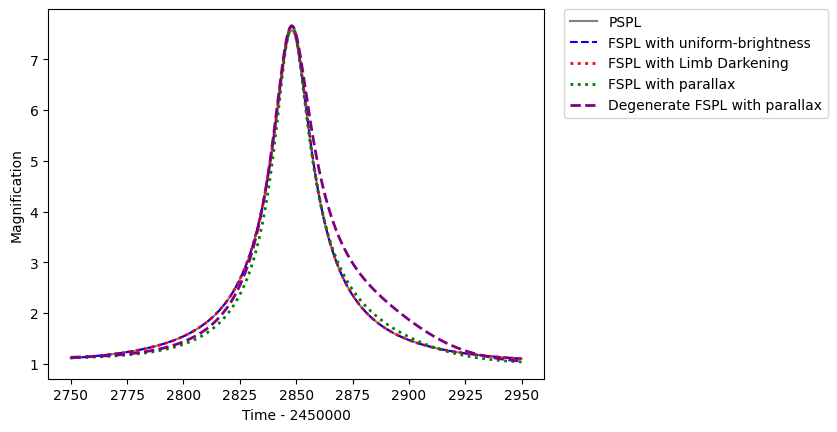

In [8]:
#@title Plotting the magnification models

# plot bounds
t_min = 2452750
t_max = 2452950
t_range = [t_min, t_max]

# Model parameters
t_0 =  2452848.06
u_0 = 0.133
t_E = 61.5
log_rho = -1.4 #@param {type:"slider", min:-3, max:0, step:0.1}
rho = 10**log_rho
pi_E_E = -1.4 #@param {"type":"slider","min":-5,"max":5,"step":0.1}
pi_E_N = 1.7 #@param {type:"slider", min:-5, max:5, step:0.1}
t_0_par = 2452848.06 # should not change during modelling and needs to be close to t_0

# Define a point source, point lens model
pspl = MulensModel.Model({'t_0': t_0, 'u_0': u_0, 't_E': t_E})

# Define a finite source, point lens model
fspl = MulensModel.Model({'t_0': t_0, 'u_0': u_0, 't_E': t_E, 'rho': rho})

# Define a parallax model
fspl_pllx = MulensModel.Model({'t_0': t_0,
                          'u_0': u_0,
                          't_E': t_E,
                          'rho': rho,
                          'pi_E_E': pi_E_E,
                          'pi_E_N': pi_E_N,
                          't_0_par': t_0_par
                          },
                         ra='18:04:45.71',
                         dec='-26:59:15.2'
                         )

# Define a LOM model?

# Plot the magnification curve:
plt.close(0)
plt.figure(0)
pspl.plot_magnification(
    t_range=t_range,
    subtract_2450000=True,
    color='grey',
    linestyle='-',
    label='PSPL'
    )

# calculate the magnification curve using a finite source model
fspl.set_magnification_methods([2450000., finite_source_methods[1], 2470000.])  # rho = 0.1
fspl.plot_magnification(
    t_range=t_range,
    subtract_2450000=True,
    color='blue',
    linestyle='--',
    label='FSPL with uniform-brightness'
    )

# calculate the magnification curve using a finite source model with limb darkening
fspl.set_magnification_methods([2450000., finite_source_methods[5], 2470000.])  # rho = 0.1
fspl.plot_magnification(
    t_range=t_range,
    subtract_2450000=True,
    color='red',
    linestyle=':',
    linewidth=2,
    label='FSPL with Limb Darkening'
    )

# calculate the magnification curve using a finite source model and parallax
fspl_pllx.set_magnification_methods([2450000., finite_source_methods[1], 2470000.])  # rho = 0.1
fspl_pllx.plot_magnification(
    t_range=t_range,
    subtract_2450000=True,
    color='green',
    linestyle=':',
    linewidth=2,
    label='FSPL with parallax'
    )


# calculate the degenerate finite-source, parallax solution
fspl_pllx.set_magnification_methods([2450000., finite_source_methods[3], 2470000.])
parameters = ["t_0", "u_0", "t_E", "rho", "pi_E_E", "pi_E_N", "t_0_par"]
setattr(fspl_pllx.parameters, "u_0", -u_0)  # multiply u0 by -1 to get the degenerate solution
fspl_pllx.plot_magnification(
    t_range=t_range,
    subtract_2450000=True,
    color='purple',
    linestyle='--',
    linewidth=2,
    label='Degenerate FSPL with parallax'
    )

plt.legend(loc='upper left', bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.show()

If your version of Mulens model is working, this figure should have rendered without an error.

> There are a few things to take away from this plot:
> * the finite source effect has a big affect on the shape of the magnification curve
> * the surface brightness model (e.g., uniform) for the source has much less of an affect
> * the degenerate parallax solutions may be noticably different with sufficiently large parallax
> * parallax does not need to be as big, for the affect to noticably change the magnification curve, compared with a static model.

> **Exercise X**
>
> Try playing with the parallax (`"pi_E_N"`, `"pi_E_E"`) and finite source (`"rho"`)parameters and see how they  change your magnification model.

> *Note. This is not an interactive plot. You have to run the cell again after moving the slider.*

## <font face="Helvetica" size="6"> 3. OGLE EWS Bulk Lightcurve Fit </font>
<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">

The Roman style data have many epoch which make the evaluation of a magnification model take a long time. Ground -based data, on the other hand have much fewer epochs and alert pages, such as OGLEs EWS, which estimate fit parameters for us. We are going to design our bulk fit on these much more tractible data and then apply it to a simulated Roman season later.



### <font face="Helvetica" size="5"> 3.1 Getting the ground-based data <a id="section-22"></a> </font>

Let's start this process by scraping for some lightcurves and microlensing model parameter estimates.

In [9]:
#@title Web scrapping functions

def get_data_url(event: str) -> str:
    '''Takes an event name and returns the URL for the data page.'''

    event = event.split('-') # split the event name into its components, seperated by '-'
    year = event[0]  # the first component is the year
    region = event[1].lower()  # the second component is region (e.g., blg or gd), which we need to make lower case.
    number = event[2]  #
    url = f'https://www.astrouw.edu.pl/ogle/ogle4/ews/{year}/{region}-{number}/phot.dat'

    return url

def fetch_event_data(url: str) -> pd.DataFrame:
    '''Takes a url and returns the data as a pandas dataframe.'''

    # Read the data from the URL
    response = urllib.request.urlopen(url)
    data = response.read().decode('utf-8')

    # Convert the data to a pandas DataFrame
    #df = pd.read_csv(StringIO(data), delim_whitespace=True, header=None, names=['HJD', 'I magnitude', 'magnitude error', 'seeing', 'sky level'])
    df = pd.read_csv(StringIO(data), sep=r'\s+', header=None, names=['HJD', 'I magnitude', 'magnitude error', 'seeing', 'sky level'])

    return df

# Test
event = '2017-BLG-0001'
event_data_url = get_data_url(event)
data = fetch_event_data(event_data_url)
print(data)

               HJD  I magnitude  magnitude error  seeing  sky level
0     2.457060e+06       17.644            0.034    7.59     1155.0
1     2.457061e+06       17.665            0.027    6.44      945.0
2     2.457061e+06       17.652            0.025    4.90     1305.0
3     2.457062e+06       17.682            0.024    5.85      934.0
4     2.457062e+06       17.702            0.023    5.10     1085.0
...            ...          ...              ...     ...        ...
2657  2.458047e+06       17.666            0.031    7.25      996.0
2658  2.458049e+06       17.661            0.018    4.33      703.0
2659  2.458049e+06       17.682            0.017    4.14      844.0
2660  2.458054e+06       17.672            0.035    6.18     1496.0
2661  2.458054e+06       17.686            0.041    7.01     1568.0

[2662 rows x 5 columns]


Great. Now that we have functions to fetch lightcurves from the OGLE EWS website, we can just grab those when we need them. But we also need some good parameter estimates if we don't want our fits to take eternity to run, or potentially fail to find the likelihood maximum. Estimating these parameters is part of the EWS process, so we can shamlessly steal from those for this exercise.

In [10]:
#@title More web scraping (this time for the EWS table)

def fetch_table_data(url):
    '''Takes a URL and returns the first table as a pandas DataFrame.'''
    source = urllib.request.urlopen(url).read()
    soup = bs.BeautifulSoup(source, 'lxml')
    table = soup.find_all('table')
    df = pd.read_html(StringIO(str(table)))[0]

    return df

ews_url = "https://ogle.astrouw.edu.pl/ogle4/ews/ews.html"
ews_df = fetch_table_data(ews_url)
print(ews_df)

     Unnamed: 0          Event      Field  Star No   RA (J2000)  Dec (J2000)  \
0           NaN  2025-BLG-0001  BLG497.22    26223  17:19:44.68  -27:43:21.4   
1           NaN  2025-BLG-0002  BLG498.16    23293  17:17:24.61  -29:19:44.8   
2           NaN  2025-BLG-0003  BLG498.24   149001  17:18:03.34  -28:50:21.4   
3           NaN  2025-BLG-0004  BLG498.29     2940  17:20:03.15  -28:41:15.5   
4           NaN  2025-BLG-0005  BLG499.29    47835  17:19:54.58  -29:57:28.0   
..          ...            ...        ...      ...          ...          ...   
490         NaN  2025-BLG-0482  BLG630.15    79468  17:43:21.91  -21:02:08.3   
491         NaN  2025-BLG-0483  BLG675.13    57372  17:40:08.79  -27:39:25.0   
492         NaN  2025-BLG-0484  BLG843.02     3623  18:02:24.62  -16:03:56.9   
493         NaN  2025-BLG-0485  BLG930.07    18770  17:23:23.13  -40:06:19.3   
494         NaN  2025-BLG-0486  BLG971.05    52391  17:19:52.89  -25:45:25.6   

      Tmax (HJD)      Tmax (UT)     tau

Let's just loop through all the events and add the data URLs to the pandas dataframe, for convenience.

In [11]:
#@title Adding a URL column to the data frame

# Add a new column to the EWS data frame ('ews_df'), using the column name 'event data url'.
ews_df['event data url'] = ews_df['Event'].apply(get_data_url)
print(ews_df)
print(min(ews_df['Tmax (HJD)']), max(ews_df['Tmax (HJD)']))
print(min(ews_df['Umin']), max(ews_df['Umin']))
print(min(ews_df['tau']), max(ews_df['tau']))

     Unnamed: 0          Event      Field  Star No   RA (J2000)  Dec (J2000)  \
0           NaN  2025-BLG-0001  BLG497.22    26223  17:19:44.68  -27:43:21.4   
1           NaN  2025-BLG-0002  BLG498.16    23293  17:17:24.61  -29:19:44.8   
2           NaN  2025-BLG-0003  BLG498.24   149001  17:18:03.34  -28:50:21.4   
3           NaN  2025-BLG-0004  BLG498.29     2940  17:20:03.15  -28:41:15.5   
4           NaN  2025-BLG-0005  BLG499.29    47835  17:19:54.58  -29:57:28.0   
..          ...            ...        ...      ...          ...          ...   
490         NaN  2025-BLG-0482  BLG630.15    79468  17:43:21.91  -21:02:08.3   
491         NaN  2025-BLG-0483  BLG675.13    57372  17:40:08.79  -27:39:25.0   
492         NaN  2025-BLG-0484  BLG843.02     3623  18:02:24.62  -16:03:56.9   
493         NaN  2025-BLG-0485  BLG930.07    18770  17:23:23.13  -40:06:19.3   
494         NaN  2025-BLG-0486  BLG971.05    52391  17:19:52.89  -25:45:25.6   

      Tmax (HJD)      Tmax (UT)     tau

Nice! Now we have some data to test on. And some web scraping skills under our belts too. We should quickly test this with a single lightcurve, and plot the model from the OGLE EWS table.

> **Exercise X**
>
> Complete the plot below.

2025-BLG-0001
Index(['Unnamed: 0', 'Event', 'Field', 'Star No', 'RA (J2000)', 'Dec (J2000)',
       'Tmax (HJD)', 'Tmax (UT)', 'tau', 'Umin', 'Amax', 'Dmag', 'fbl', 'Ibl',
       'I0', 'event data url'],
      dtype='object')


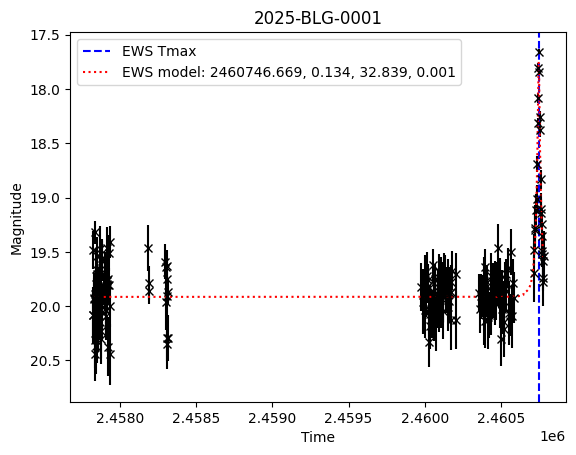

In [12]:
#@title Plotting the '2025-BLG-0001' event with the EWS model


# [ ] add parallax to the model.
# [ ] edit to include the other ews parameters


# Function to process a single event
def plot_event_data(i, ews_df):
    event = ews_df['Event'][i]
    print(event)
    print(ews_df.columns)
    url = ews_df['event data url'][i]
    data = fetch_event_data(url)
    t_0_0 = ews_df['Tmax (HJD)'][i]
    u_0_0 = ews_df['Umin'][i] * 1.1  # initial guess
    t_E_0 = ews_df['tau'][i] * 1.1  # initial guess
    rho_0 = 0.001  # initial guess


    plt.close(i+1)
    plt.figure(i+1)

    plt.errorbar(data['HJD'],
                  data['I magnitude'],
                  yerr=data['magnitude error'],
                  fmt='x',
                  color='black'
                  )
    plt.axvline(ews_df['Tmax (HJD)'][i], color='blue', linestyle='--', label='EWS Tmax')

    plt.title(event)
    plt.xlabel('HJD')
    plt.ylabel('I magnitude')

    # Data as a list of numpy arrays
    data_list = [data['HJD'].to_numpy(), data['I magnitude'].to_numpy(), data['magnitude error'].to_numpy()]

    # Pack everything into MulensModel objects
    data_object = MulensModel.MulensData(data_list=data_list,
                                plot_properties={'color': 'thistle',
                                                 'label': 'OGLE',
                                                 'marker': 'x',
                                                 'markersize': 2
                                                 },
                                phot_fmt='mag',
                                bandpass='I'
                                )
    fspl_model = MulensModel.Model({'t_0': t_0_0, 'u_0': u_0_0, 't_E': t_E_0, 'rho': rho_0})
    fspl_model.set_magnification_methods([t_0_0 - 3.0 * t_E_0,
                                          'finite_source_uniform_Gould94',
                                          t_0_0 + 3.0 * t_E_0
                                          ],
                                          source=None
                                          )  # rho <= 0.1
    event_object = MulensModel.Event(datasets=data_object, model=fspl_model)

    parameters_to_fit = ["t_0", "u_0", "t_E", "rho"]

    # Plot the initial model
    event_object.plot_model(color='r',
                            linestyle=':',
                            t_range=[min(data['HJD']),
                                     max(data['HJD'])
                                    ],
                            label='EWS model: %1.3f, %1.3f, %1.3f, %1.3f' %(t_0_0, u_0_0, t_E_0, rho_0)
                            )

    plt.legend()
    plt.savefig(f'./{event}.png', bbox_inches='tight')
    plt.show()

plot_event_data(0, ews_df)


Is it working?

If so, we can move on and test our fitting algorithms.

First, we’ll need an **objective function** — a way to measure how well our model fits the data (or, more precisely, how likely the model is to have generated the data, assuming Gaussian noise).

### <font face="Helvetica" size="5"> 3.2 Fitting basic PSPL model to <a id="section-22"></a> </font>

In [13]:
def chi2_fun(theta, parameters_to_fit, event):
    """
    Calculate chi2 for given values of parameters.

    Parameters
    ----------
    theta : np.ndarray
        Vector of parameter values, e.g., `np.array([5380., 0.5, 20.])`.
    parameters_to_fit : list of str
        List of names of parameters corresponding to theta, e.g., `['t_0', 'u_0', 't_E']`.
    event : MulensModel.Event
        Event which has datasets for which chi2 will be calculated.

    Returns
    -------
    chi2 : float
        Chi2 value for given model parameters.

    Notes
    -----
    Function from MulensModel documentation:
    https://github.com/rpoleski/MulensModel/blob/master/examples/example_02_fitting.py
    """
    # First we have to change the values of parameters in
    # event.model.parameters to values given by theta.
    for (parameter, value) in zip(parameters_to_fit, theta):
        setattr(event.model.parameters, parameter, value)

    # After that, calculating chi2 is trivial:
    return event.get_chi2()


# this function is needed for packages like emcee, but it is also used here
# to apply priors (or bounds) to our scipy.minimize fit.
def mulens_neglogP_function(theta, parameters_to_fit, event, verbose=False):
    ''' negative log prob function for MulensModel fitting'''

    # model parameter priors
    if (theta[0] < (2460281.208-100)) or (theta[0] > (2461373.155 + 100)):  # t_0
        return np.inf
    elif (theta[1] < 0.000001) or (theta[1] > 2.0):  # u_0
        return np.inf
    elif (theta[2] < 0.1) or (theta[2] > 700):  # t_E
        return np.inf
    elif theta[3] < 0 or theta[3] > 0.2:  # rho
        return np.inf
    else:
        for (parameter, value) in zip(parameters_to_fit, theta):
            setattr(event.model.parameters, parameter, value)

        dataset = event.datasets[0]
        event.fit_fluxes()
        ([FS], FB) = event.get_flux_for_dataset(dataset)
        penalty = 0.0
        #penalty = ((FB / 100)**2)  # why 100? I told you, vibes.

        if verbose:
            print(f'FS: {FS}, FB: {FB}')

        # other priors
        #if FS <= 0 or FB < -100 or (FS + FB) <= 0: # alow some negative blending
        #    return np.inf
        if FS <= 0 or (FS + FB) <= 0:
            return np.inf
        else:
            if verbose:
                print('chi2 = ', event.get_chi2())
            return event.get_chi2() + penalty  # negative log prob (technically it should be half this)


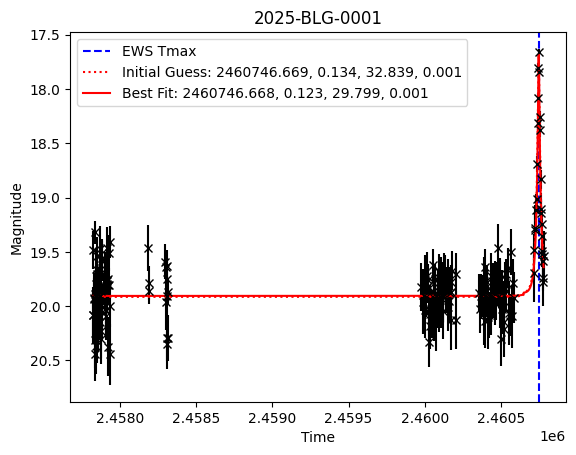


 2025-BLG-0001
-----------------
t_0: 2460746.668
u_0: 0.123
t_E: 29.799
rho: 0.001
-----------------
Time elapsed: 1.699124813079834 seconds
-----------------
FS: 6.530821656110846, FB: 0.3512224089357798
chi2 =  213.53597130835215
-----------------
Initial chi2: 231.85337364011747
Final chi2: 213.53597130835215
Delta chi2: -18.317402331765322
Delta chi2/dof:  -0.09113135488440459
-----------------

 2025-BLG-0002
-----------------
t_0: 2460718.156
u_0: 0.025
t_E: 357.511
rho: 0.000
-----------------
Time elapsed: 5.089899063110352 seconds
-----------------
FS: 1.685630166933586, FB: 13.89862866567525
chi2 =  329.9881070814221
-----------------
Initial chi2: 438.4536698842978
Final chi2: 329.9881070814221
Delta chi2: -108.46556280287575
Delta chi2/dof:  -0.44636034075257514
-----------------

 2025-BLG-0003
-----------------
t_0: 2460737.041
u_0: 0.136
t_E: 15.802
rho: 0.019
-----------------
Time elapsed: 7.1459739208221436 seconds
-----------------
FS: 6.197293209583129, FB: -1.525

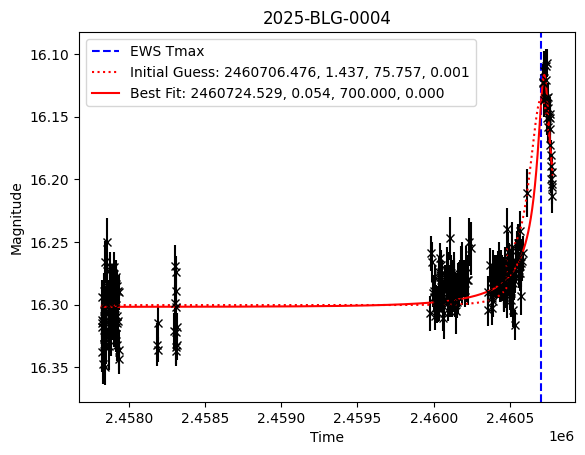


 2025-BLG-0004
-----------------
t_0: 2460724.529
u_0: 0.054
t_E: 700.000
rho: 0.000
-----------------
Time elapsed: 9.733611583709717 seconds
-----------------
FS: 2.016672594920625, FB: 188.21815777168268
chi2 =  415.832283690728
-----------------
Initial chi2: 613.626944184949
Final chi2: 415.832283690728
Delta chi2: -197.79466049422103
Delta chi2/dof:  -0.8040433353423619
-----------------

 2025-BLG-0005
-----------------
t_0: 2460742.515
u_0: 0.005
t_E: 39.847
rho: 0.001
-----------------
Time elapsed: 10.40049433708191 seconds
-----------------
FS: 5.104664882427529, FB: 0.489939314633633
chi2 =  116.56213666782187
-----------------
Initial chi2: 142.86189401472228
Final chi2: 116.56213666782187
Delta chi2: -26.299757346900407
Delta chi2/dof:  -0.20872823291190798
-----------------

 2025-BLG-0006
-----------------
t_0: 2460734.908
u_0: 0.000
t_E: 12.620
rho: 0.001
-----------------
Time elapsed: 12.451409339904785 seconds
-----------------
FS: 6.816907060677631, FB: 1.67949663

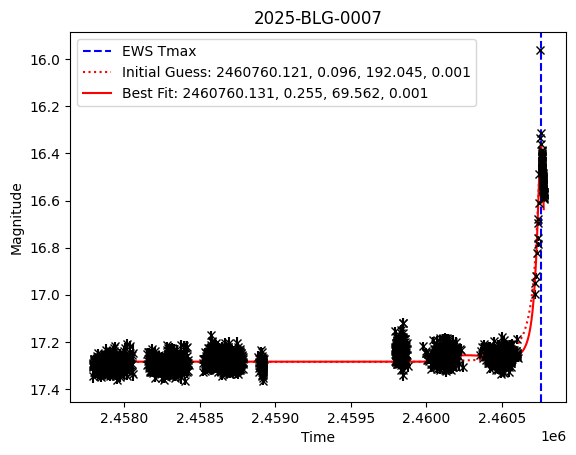


 2025-BLG-0007
-----------------
t_0: 2460760.131
u_0: 0.255
t_E: 69.562
rho: 0.001
-----------------
Time elapsed: 18.594556093215942 seconds
-----------------
FS: 34.29427211977521, FB: 42.66612854646661
chi2 =  15725.990137856712
-----------------
Initial chi2: 16386.749564892434
Final chi2: 15725.990137856712
Delta chi2: -660.7594270357222
Delta chi2/dof:  -0.1715812586433971
-----------------

 2025-BLG-0008
-----------------
t_0: 2460737.768
u_0: 1.595
t_E: 7.009
rho: 0.026
-----------------
Time elapsed: 26.022786855697632 seconds
-----------------
FS: 202.74526356632546, FB: -194.05114552501132
chi2 =  7982.2966507841875
-----------------
Initial chi2: 8063.058171780314
Final chi2: 7982.2966507841875
Delta chi2: -80.76152099612682
Delta chi2/dof:  -0.02155364851778138
-----------------

 2025-BLG-0009
-----------------
t_0: 2460780.958
u_0: 1.498
t_E: 23.453
rho: 0.001
-----------------
Time elapsed: 32.28817653656006 seconds
-----------------
FS: 199.89178203173063, FB: -151.

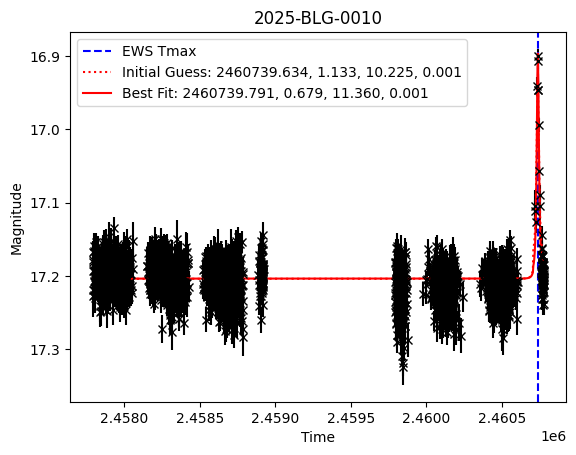


 2025-BLG-0010
-----------------
t_0: 2460739.791
u_0: 0.679
t_E: 11.360
rho: 0.001
-----------------
Time elapsed: 37.39411735534668 seconds
-----------------
FS: 37.92249077787394, FB: 44.96404714211106
chi2 =  7314.9518233659555
-----------------
Initial chi2: 7548.216595254231
Final chi2: 7314.9518233659555
Delta chi2: -233.2647718882754
Delta chi2/dof:  -0.06060399373558727
-----------------

 2025-BLG-0011
-----------------
t_0: 2460746.244
u_0: 0.584
t_E: 14.158
rho: 0.001
-----------------
Time elapsed: 41.71633219718933 seconds
-----------------
FS: 16.803524053760277, FB: 5.701607083935356
chi2 =  12044.202733515507
-----------------
Initial chi2: 12094.755522021243
Final chi2: 12044.202733515507
Delta chi2: -50.552788505736316
Delta chi2/dof:  -0.013520403451654537
-----------------

 2025-BLG-0012
-----------------
t_0: 2460759.439
u_0: 0.148
t_E: 34.923
rho: 0.001
-----------------
Time elapsed: 47.46468782424927 seconds
-----------------
FS: 236.80056418060352, FB: 15.44

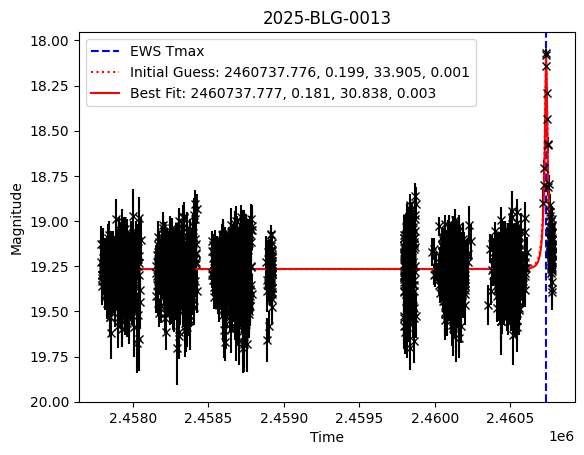


 2025-BLG-0013
-----------------
t_0: 2460737.777
u_0: 0.181
t_E: 30.838
rho: 0.003
-----------------
Time elapsed: 52.65845203399658 seconds
-----------------
FS: 5.357259081397277, FB: 7.053408669753986
chi2 =  7131.8887694306095
-----------------
Initial chi2: 7172.899178074332
Final chi2: 7131.8887694306095
Delta chi2: -41.01040864372226
Delta chi2/dof:  -0.01070767849705542
-----------------

 2025-BLG-0014
-----------------
t_0: 2460722.633
u_0: 1.998
t_E: 71.749
rho: 0.013
-----------------
Time elapsed: 56.8860821723938 seconds
-----------------
FS: 4114.649253255379, FB: -968.3531236770599
chi2 =  38714.01724608347
-----------------
Initial chi2: 160789.68660537203
Final chi2: 38714.01724608347
Delta chi2: -122075.66935928856
Delta chi2/dof:  -40.288999788544075
-----------------

 2025-BLG-0015
-----------------
t_0: 2460717.197
u_0: 0.286
t_E: 31.531
rho: 0.001
-----------------
Time elapsed: 61.2977454662323 seconds
-----------------
FS: 148.45385322385482, FB: -16.7501603

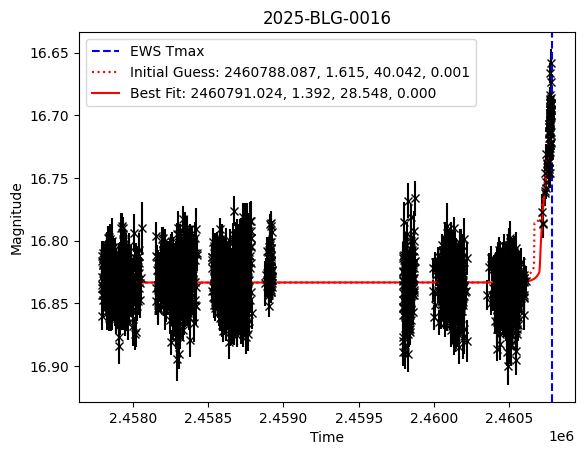


 2025-BLG-0016
-----------------
t_0: 2460791.024
u_0: 1.392
t_E: 28.548
rho: 0.000
-----------------
Time elapsed: 66.70348525047302 seconds
-----------------
FS: 85.18061084896188, FB: 31.411513863373877
chi2 =  8555.962472880004
-----------------
Initial chi2: 8621.501484676735
Final chi2: 8555.962472880004
Delta chi2: -65.53901179673085
Delta chi2/dof:  -0.019219651553293502
-----------------

 2025-BLG-0017
-----------------
t_0: 2460772.531
u_0: 0.277
t_E: 34.582
rho: 0.001
-----------------
Time elapsed: 69.07888650894165 seconds
-----------------
FS: 41.268869788275374, FB: 7.05847728941191
chi2 =  11179.737802785392
-----------------
Initial chi2: 11992.501964163843
Final chi2: 11179.737802785392
Delta chi2: -812.7641613784508
Delta chi2/dof:  -0.2103971424743595
-----------------

 2025-BLG-0018
-----------------
t_0: 2460721.851
u_0: 1.443
t_E: 27.176
rho: 0.004
-----------------
Time elapsed: 76.25419569015503 seconds
-----------------
FS: 156.49425517548184, FB: -98.63730

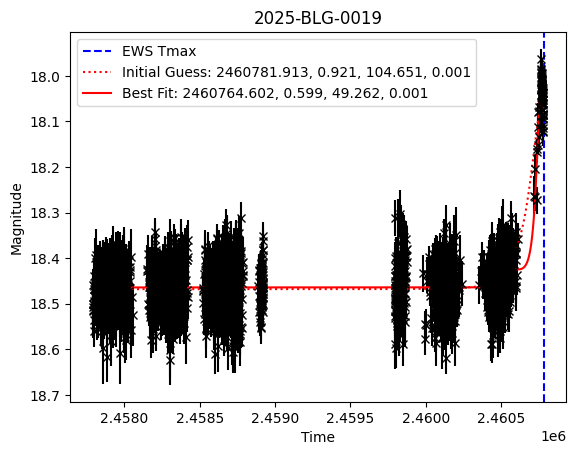


 2025-BLG-0019
-----------------
t_0: 2460764.602
u_0: 0.599
t_E: 49.262
rho: 0.001
-----------------
Time elapsed: 83.47079133987427 seconds
-----------------
FS: 14.820679083437604, FB: 11.140541937386194
chi2 =  5706.254702937897
-----------------
Initial chi2: 6231.5192639931465
Final chi2: 5706.254702937897
Delta chi2: -525.2645610552499
Delta chi2/dof:  -0.1362553984579118
-----------------

 2025-BLG-0020
-----------------
t_0: 2460778.292
u_0: 0.147
t_E: 90.077
rho: 0.017
-----------------
Time elapsed: 88.46927785873413 seconds
-----------------
FS: 72.85654393272686, FB: 45.24766071195321
chi2 =  6796.421589671971
-----------------
Initial chi2: 15622.058597289422
Final chi2: 6796.421589671971
Delta chi2: -8825.637007617452
Delta chi2/dof:  -2.285250390372204
-----------------

 2025-BLG-0021
-----------------
t_0: 2460745.734
u_0: 0.086
t_E: 17.643
rho: 0.001
-----------------
Time elapsed: 91.31362867355347 seconds
-----------------
FS: 6.866513837790066, FB: 13.0831451477

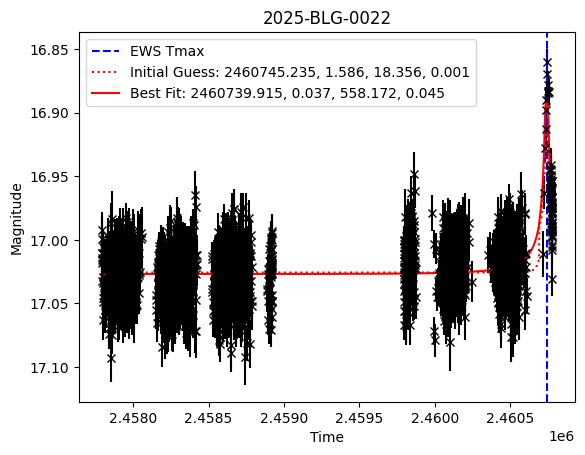


 2025-BLG-0022
-----------------
t_0: 2460739.915
u_0: 0.037
t_E: 558.172
rho: 0.045
-----------------
Time elapsed: 96.20475721359253 seconds
-----------------
FS: 0.3788215276202974, FB: 97.17435775002274
chi2 =  6755.02873424741
-----------------
Initial chi2: 7146.08250769806
Final chi2: 6755.02873424741
Delta chi2: -391.0537734506497
Delta chi2/dof:  -0.10188998787145641
-----------------

 2025-BLG-0023
-----------------
t_0: 2460747.258
u_0: 0.029
t_E: 10.738
rho: 0.001
-----------------
Time elapsed: 99.88036847114563 seconds
-----------------
FS: 25.179288502665354, FB: 8.052135638319413
chi2 =  8183.491341689783
-----------------
Initial chi2: 8394.989461216508
Final chi2: 8183.491341689783
Delta chi2: -211.49811952672462
Delta chi2/dof:  -0.05523586302604456
-----------------

 2025-BLG-0024
-----------------
t_0: 2460742.208
u_0: 0.539
t_E: 20.458
rho: 0.002
-----------------
Time elapsed: 103.139568567276 seconds
-----------------
FS: 14.886305382834568, FB: 81.7535006421

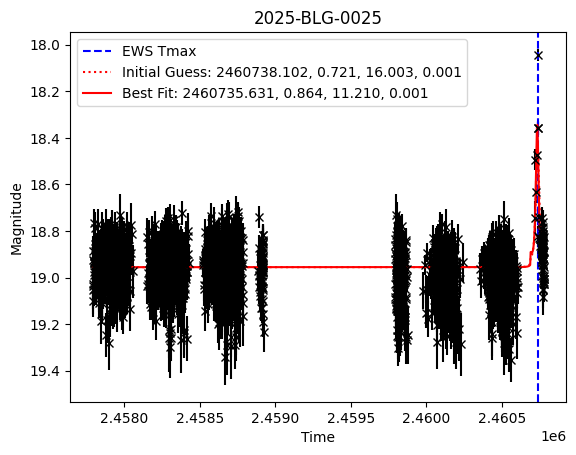


 2025-BLG-0025
-----------------
t_0: 2460735.631
u_0: 0.864
t_E: 11.210
rho: 0.001
-----------------
Time elapsed: 107.50225329399109 seconds
-----------------
FS: 27.62161811137606, FB: -11.107523138520476
chi2 =  7719.03515852002
-----------------
Initial chi2: 7763.620657887891
Final chi2: 7719.03515852002
Delta chi2: -44.58549936787131
Delta chi2/dof:  -0.011619885162332892
-----------------

 2025-BLG-0026
-----------------
t_0: 2460746.981
u_0: 0.211
t_E: 26.886
rho: 0.001
-----------------
Time elapsed: 112.20446395874023 seconds
-----------------
FS: 4.9392394419928385, FB: 10.356423504746559
chi2 =  7018.578844208525
-----------------
Initial chi2: 7078.762745661346
Final chi2: 7018.578844208525
Delta chi2: -60.183901452821374
Delta chi2/dof:  -0.0155876460639268
-----------------

 2025-BLG-0027
-----------------
t_0: 2460716.758
u_0: 1.883
t_E: 13.720
rho: 0.006
-----------------
Time elapsed: 117.193852186203 seconds
-----------------
FS: 547.177439743843, FB: -443.058403

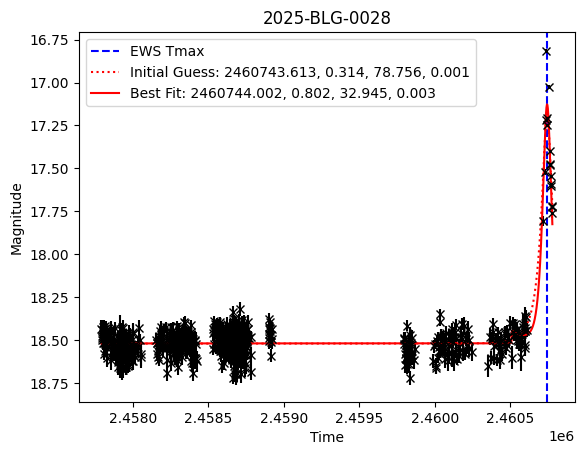


 2025-BLG-0028
-----------------
t_0: 2460744.002
u_0: 0.802
t_E: 32.945
rho: 0.003
-----------------
Time elapsed: 119.50157308578491 seconds
-----------------
FS: 121.4389995932432, FB: -96.78396181027834
chi2 =  3827.230678226543
-----------------
Initial chi2: 4000.8141646959857
Final chi2: 3827.230678226543
Delta chi2: -173.5834864694425
Delta chi2/dof:  -0.23713591047738047
-----------------

 2025-BLG-0029
-----------------
t_0: 2460695.180
u_0: 0.204
t_E: 52.496
rho: 0.002
-----------------
Time elapsed: 122.78383755683899 seconds
-----------------
FS: 268.4376255052053, FB: 57.50361288636037
chi2 =  1772.0889328677215
-----------------
Initial chi2: 2211.7122092682157
Final chi2: 1772.0889328677215
Delta chi2: -439.6232764004942
Delta chi2/dof:  -0.5467951199011122
-----------------

 2025-BLG-0030
-----------------
t_0: 2460751.376
u_0: 2.000
t_E: 33.923
rho: 0.026
-----------------
Time elapsed: 124.75689125061035 seconds
-----------------
FS: 3186.810553146758, FB: -2076.8

In [14]:

# Function to process a single event
def process_event(i, ews_df, n, start_time, verbose=True):
    event = ews_df['Event'][i]
    url = ews_df['event data url'][i]
    data = fetch_event_data(url)
    t_0_0 = ews_df['Tmax (HJD)'][i]
    u_0_0 = ews_df['Umin'][i] * 1.1  # initial guess
    t_E_0 = ews_df['tau'][i] * 1.1  # initial guess
    rho_0 = 0.001  # initial guess

    if i % n == 0:
        plt.close(i)
        plt.figure(i)

        plt.errorbar(data['HJD'],
                     data['I magnitude'],
                     yerr=data['magnitude error'],
                     fmt='x',
                     color='black'
                     )
        plt.axvline(ews_df['Tmax (HJD)'][i], color='blue', linestyle='--', label='EWS Tmax')

        plt.title(event)
        plt.xlabel('HJD')
        plt.ylabel('I magnitude')

    ######################
    # Your code here

    # Data as a list of numpy arrays
    data_list = [data['HJD'].to_numpy(), data['I magnitude'].to_numpy(), data['magnitude error'].to_numpy()]

    # Pack everything into MulensModel objects
    data_object = MulensModel.MulensData(data_list=data_list,
                                plot_properties={'color': 'thistle',
                                                 'label': 'OGLE',
                                                 'marker': 'x',
                                                 'markersize': 2
                                                 },
                                phot_fmt='mag',
                                bandpass='I'
                                )
    fspl_model = MulensModel.Model({'t_0': t_0_0, 'u_0': u_0_0, 't_E': t_E_0, 'rho': rho_0})
    fspl_model.set_magnification_methods([t_0_0 - 3.0 * t_E_0,
                                          'finite_source_uniform_Gould94',
                                          t_0_0 + 3.0 * t_E_0
                                          ],
                                          source=None
                                          )  # rho <= 0.1
    event_object = MulensModel.Event(datasets=data_object, model=fspl_model)

    parameters_to_fit = ["t_0", "u_0", "t_E", "rho"]

    # Plot the initial model
    if i % n == 0:
        event_object.plot_model(color='r',
                                linestyle=':',
                                t_range=[min(data['HJD']),
                                         max(data['HJD'])
                                         ],
                                label='Initial Guess: %1.3f, %1.3f, %1.3f, %1.3f' %(t_0_0, u_0_0, t_E_0, rho_0)
                                )
    # get initial chi2
    initial_chi2 = event_object.get_chi2()

    # Fit using scipy Nelder-Mead
    result = minimize(mulens_neglogP_function, [t_0_0, u_0_0, t_E_0, rho_0], args=(parameters_to_fit, event_object), method='Nelder-Mead')

    # Plot the fit model and show
    if i % n == 0:
        chi2_fun(result.x, parameters_to_fit, event_object)
        event_object.plot_model(color='r',
                                linestyle='-',
                                t_range=[min(data['HJD']),
                                         max(data['HJD'])
                                         ],
                                label='Best Fit: {0[0]:1.3f}, {0[1]:1.3f}, {0[2]:1.3f}, {0[3]:1.3f}'.format(result.x)  # Corrected line
                                )
        plt.legend()
        plt.savefig(f'./{event}.png', bbox_inches='tight')
        plt.show()

    if verbose:
        print('\n', event)
        print('-----------------')
        print(f't_0: {result.x[0]:1.3f}')
        print(f'u_0: {result.x[1]:1.3f}')
        print(f't_E: {result.x[2]:1.3f}')
        print(f'rho: {result.x[3]:1.3f}')
        print('-----------------')
        print(f'Time elapsed: {time.time() - start_time} seconds')
        print('-----------------')
        mulens_neglogP_function(result.x, parameters_to_fit, event_object, verbose=True)
        print('-----------------')
        print(f'Initial chi2: {initial_chi2}')
        print(f'Final chi2: {event_object.get_chi2()}')
        print(f'Delta chi2: {event_object.get_chi2() - initial_chi2}')
        print('Delta chi2/dof: ',(event_object.get_chi2() - initial_chi2) / (len(data['HJD']) - 4))
        print('-----------------')

    return i, result.x


# numpy array for the fit params
fit_params = np.zeros((ews_df.shape[0], 4))

plot_fraction = 0.1
N=30

start_time = time.time()
for i in range(N):
    i, result = process_event(i, ews_df, N*plot_fraction, start_time, verbose=True)

    fit_params[i] = result

# Geez, how long is this going to take?
time_at_N = time.time()
time_for_N = time_at_N - start_time
print(f'Time taken to fit the first {N}: {time_for_N} seconds')

# Estimate completion time
completion_time = time_at_N + (ews_df.shape[0] - N) / N * time_for_N
print(time_at_N, (ews_df.shape[0] - N) / N, time_for_N)

# Print the completion time in human readable format hr:min:sec
print(f'Estimated season completion time: {time.strftime("%H:%M:%S", time.localtime(completion_time))}')
end_time = time.time()

### <font face="Helvetica" size="5"> 3.3 Priors </font>

We will now interpret the deeply non-physical result where the background flux is very negative.

Likely at least a few of your events had negative $F_{\textrm{B}}$ (*we're looking at you, 2025-BLG-0030*). This is a pretty common issue with single-lens modelling.

But what does it mean?

Nothing that makes any physical sense. If the blend is a little bit negative, that can be explained by systematics in the photometry (e.g. the background was measured with very faint star in it, so our flux scale was zeroed slightly wrong), but there is no reason for the blend to be very negative; we can't detect anti-photons.

So, how can we punish the optimizer for its sins? It's actually pretty simple. We punish it by adding a penalty to the objective function. If the penalty is too abrupt, it can sometimes interfere with a gradient descent optimizer's ability to calculate gradients. But if we put a gradual penalty on it, the penalty acts to lead the optimizer in the right direction. The exact shape of the penalty doesn't really matter, it just needs to make more sense than giant negative fluxes.

This kind of penalty behaviour is called a prior. Where we use prior knowledge to inform the most probability landscape. Basically we tell optimization, “a very negative blend is dumb - don't do that.”

You might argue that you would prefer to approach your modelling from an agnostic perspective and I appreciate your integrity. The problem with that argument though is the assumption that no prior is agnostic. Because no prior is like telling your optimizer, "negative blend is just as reasonable as positive blend." That's not agnostic. You've still informed the fit. You just informed it that every solution was equally possible, which you know it's not. This not-actually-agnostic prior, where you don't code in any sort of penalties, is called a uniform prior. The concept of "no prior" is a fallacy.

So let's put a reasonable prior on the blend flux so that it stops acting up. Our other fit parameters can continue to have truncated priors (bounds).

The next question you might ask is, "how do I know which prior is the right prior" the answer to that is: vibes.
I'm not even joking. You choose a prior that is physically informed or informed by your "prior knowledge" of what your solution should be and don't worry overly much about it. You should however, always be wary that your priors are not so strong that they dominate the fit. If what you get out from a fit is very similar to your prior, that is an indication that you have been too heavy handed and you need to loosen the leash.

For example, if you made your prior a hard bound, requiring $F_{\textrm{B}}>0$, and your best fit solution was $F_{\textrm{B}}\approx0$, you have likely stopped the optimizer from exploring valid parameter space.

> Exercise X
>
> Edit `mulens_neglogP_function` to use a gaussian prior to constrain the blend flux, if it is below 0; use a piecewise prior combining:
>
> * A uniform prior for $F_\textrm{B}>0$
> * A Gaussian penalty for $F_\textrm{B}<0$


### <font face="Helvetica" size="5"> 3.4 Parallel Processing </font>

We are going to demonstrate speeding this process up with parallel processing. However, there are a few things you should know first.

If you are running on Colab, then you are computing using Google's cloud resources. Colab only allocates you 2 cores in a session. We can parallelize on these cores, but the speeds improvement won't be very dramatic. If you already have jupyter and python installed on your machine, you could run this notebook locally to use your computer's resources. If you would like the to keep the Colab features and interface, you can connect a to a local runtime using [these instructions](https://research.google.com/colaboratory/local-runtimes.html#:~:text=By%20connecting%20to%20a%20local,local%20resources%20on%20your%20machine.).

If you choose to use lcoal resources your notebook will use your local packages, so you should follow the instructions at the start of this notebook to download the yaml (assuming you have an anocanda install) accompanying this notebook and install a virtual environment using

```bash
conda create -f chapter5.yml
```

This will create a virtual conda environment called `minicourse`. Which has the required packages installed.





2

 2025-BLG-0063
-----------------
t_0: 2460769.926
u_0: 0.325
t_E: 32.734
rho: 0.001
-----------------
Time elapsed: 2.1212196350097656 seconds
-----------------
FS: 78.24373053443362, FB: 386.3024058794835
chi2 =  3330.8857414442436
-----------------
Initial chi2: 3696.2014805493627
Final chi2: 3330.8857414442436
Delta chi2: -365.31573910511906
Delta chi2/dof:  -0.257445904936659
-----------------

 2025-BLG-0001
-----------------
t_0: 2460746.668
u_0: 0.123
t_E: 29.799
rho: 0.001
-----------------
Time elapsed: 2.6644999980926514 seconds
-----------------
FS: 6.530821656110846, FB: 0.3512224089357798
chi2 =  213.53597130835215
-----------------
Initial chi2: 231.85337364011747
Final chi2: 213.53597130835215
Delta chi2: -18.317402331765322
Delta chi2/dof:  -0.09113135488440459
-----------------

 2025-BLG-0002
-----------------
t_0: 2460718.156
u_0: 0.025
t_E: 357.511
rho: 0.000
-----------------
Time elapsed: 5.037242412567139 seconds
-----------------
FS: 1.685630166933586, FB: 13

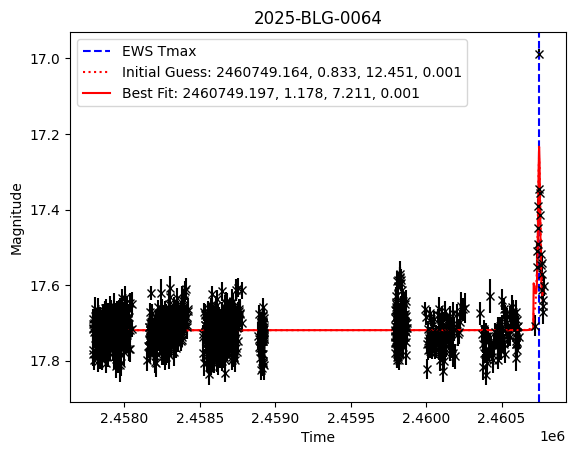


 2025-BLG-0064
-----------------
t_0: 2460749.197
u_0: 1.178
t_E: 7.211
rho: 0.001
-----------------
Time elapsed: 6.171939373016357 seconds
-----------------
FS: 119.41491877756904, FB: -67.85614200117833
chi2 =  3587.831317768038
-----------------
Initial chi2: 3603.3962720601967
Final chi2: 3587.831317768038
Delta chi2: -15.564954292158745
Delta chi2/dof:  -0.010930445429886759
-----------------

 2025-BLG-0003
-----------------
t_0: 2460737.041
u_0: 0.136
t_E: 15.802
rho: 0.019
-----------------
Time elapsed: 6.68068790435791 seconds
-----------------
FS: 6.197293209583129, FB: -1.5257636165756625
chi2 =  25.67836338972202
-----------------
Initial chi2: 32.71532146283435
Final chi2: 25.67836338972202
Delta chi2: -7.036958073112334
Delta chi2/dof:  -0.1436113892471905
-----------------


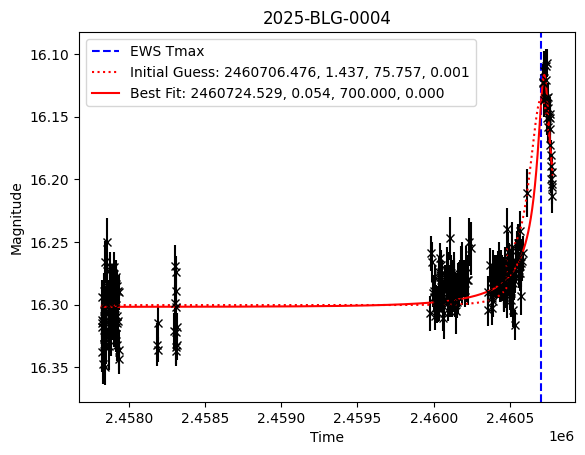


 2025-BLG-0004
-----------------
t_0: 2460724.529
u_0: 0.054
t_E: 700.000
rho: 0.000
-----------------
Time elapsed: 11.284053325653076 seconds
-----------------
FS: 2.016672594920625, FB: 188.21815777168268
chi2 =  415.832283690728
-----------------
Initial chi2: 613.626944184949
Final chi2: 415.832283690728
Delta chi2: -197.79466049422103
Delta chi2/dof:  -0.8040433353423619
-----------------

 2025-BLG-0065
-----------------
t_0: 2460699.067
u_0: 0.788
t_E: 76.810
rho: 0.001
-----------------
Time elapsed: 12.259469270706177 seconds
-----------------
FS: 56.35416214056328, FB: 4.8226451493200955
chi2 =  3824.717244813295
-----------------
Initial chi2: 3999.0382710311173
Final chi2: 3824.717244813295
Delta chi2: -174.32102621782224
Delta chi2/dof:  -0.12523062228291829
-----------------

 2025-BLG-0005
-----------------
t_0: 2460742.515
u_0: 0.005
t_E: 39.847
rho: 0.001
-----------------
Time elapsed: 12.528639078140259 seconds
-----------------
FS: 5.104664882427529, FB: 0.4899393

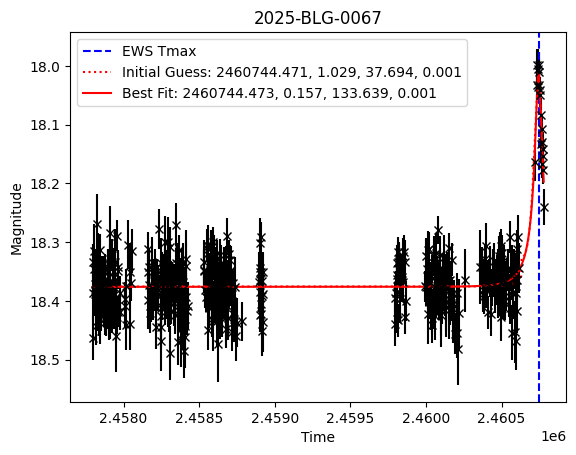


 2025-BLG-0067
-----------------
t_0: 2460744.473
u_0: 0.157
t_E: 133.639
rho: 0.001
-----------------
Time elapsed: 18.366893768310547 seconds
-----------------
FS: 2.072617526624848, FB: 26.084765864328354
chi2 =  694.8308393235766
-----------------
Initial chi2: 704.0734900504668
Final chi2: 694.8308393235766
Delta chi2: -9.242650726890247
Delta chi2/dof:  -0.018338592712083823
-----------------

 2025-BLG-0068
-----------------
t_0: 2460716.318
u_0: 0.333
t_E: 73.828
rho: 0.024
-----------------
Time elapsed: 22.17065930366516 seconds
-----------------
FS: 5.776309415021325, FB: 2.7116617761252364
chi2 =  805.2500739477323
-----------------
Initial chi2: 814.452735715412
Final chi2: 805.2500739477323
Delta chi2: -9.202661767679729
Delta chi2/dof:  -0.01769742647630717
-----------------

 2025-BLG-0069
-----------------
t_0: 2460711.107
u_0: 0.000
t_E: 61.997
rho: 0.003
-----------------
Time elapsed: 24.59301471710205 seconds
-----------------
FS: 7.747196485497239, FB: -2.2136218

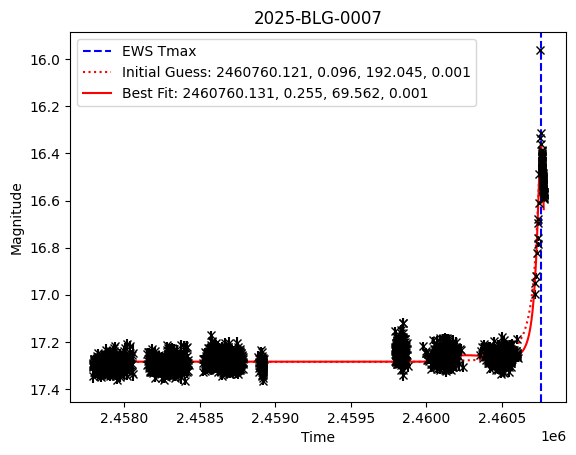


 2025-BLG-0007
-----------------
t_0: 2460760.131
u_0: 0.255
t_E: 69.562
rho: 0.001
-----------------
Time elapsed: 26.408482313156128 seconds
-----------------
FS: 34.29427211977521, FB: 42.66612854646661
chi2 =  15725.990137856712
-----------------
Initial chi2: 16386.749564892434
Final chi2: 15725.990137856712
Delta chi2: -660.7594270357222
Delta chi2/dof:  -0.1715812586433971
-----------------


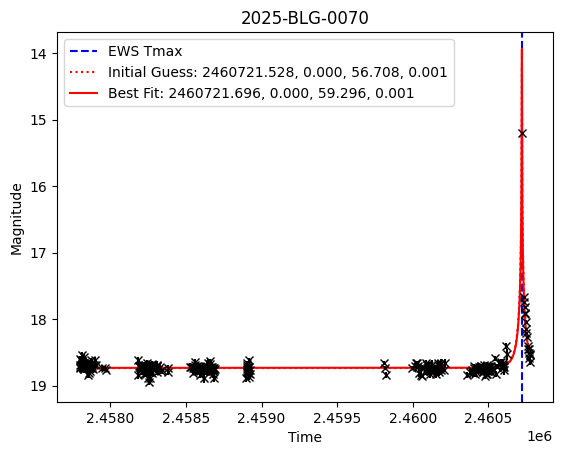


 2025-BLG-0070
-----------------
t_0: 2460721.696
u_0: 0.000
t_E: 59.296
rho: 0.001
-----------------
Time elapsed: 28.86274266242981 seconds
-----------------
FS: 10.234855423876759, FB: 10.063116313126322
chi2 =  716.6275968455056
-----------------
Initial chi2: 808.0332374391589
Final chi2: 716.6275968455056
Delta chi2: -91.40564059365329
Delta chi2/dof:  -0.321850847160751
-----------------

 2025-BLG-0071
-----------------
t_0: 2460744.272
u_0: 0.142
t_E: 24.460
rho: 0.001
-----------------
Time elapsed: 34.04985761642456 seconds
-----------------
FS: 4.052882450554541, FB: 19.761540020858387
chi2 =  2279.9231852865205
-----------------
Initial chi2: 2308.619499968865
Final chi2: 2279.9231852865205
Delta chi2: -28.696314682344564
Delta chi2/dof:  -0.022176441021904608
-----------------

 2025-BLG-0008
-----------------
t_0: 2460737.768
u_0: 1.595
t_E: 7.009
rho: 0.026
-----------------
Time elapsed: 36.429404973983765 seconds
-----------------
FS: 202.74526356632546, FB: -194.051

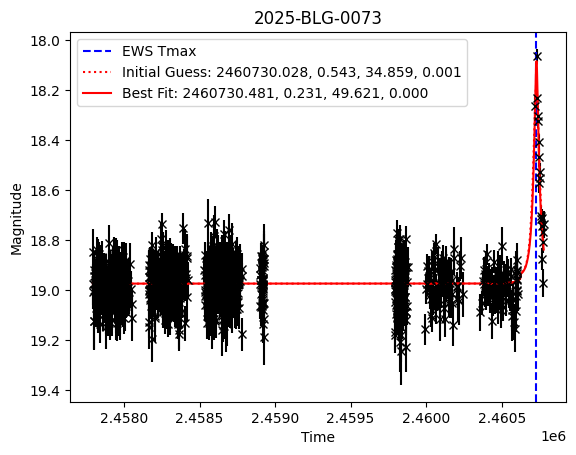


 2025-BLG-0073
-----------------
t_0: 2460730.481
u_0: 0.231
t_E: 49.621
rho: 0.000
-----------------
Time elapsed: 41.16054105758667 seconds
-----------------
FS: 6.052004279277097, FB: 10.188712710033363
chi2 =  2149.5501368728874
-----------------
Initial chi2: 2168.2587767972323
Final chi2: 2149.5501368728874
Delta chi2: -18.70863992434488
Delta chi2/dof:  -0.013527577674869761
-----------------

 2025-BLG-0074
-----------------
t_0: 2460694.097
u_0: 1.981
t_E: 26.028
rho: 0.013
-----------------
Time elapsed: 49.40255904197693 seconds
-----------------
FS: 2656.0884899021244, FB: -2006.7269642404399
chi2 =  6510.444698528347
-----------------
Initial chi2: 7409.304451019016
Final chi2: 6510.444698528347
Delta chi2: -898.859752490669
Delta chi2/dof:  -0.6485279599499777
-----------------


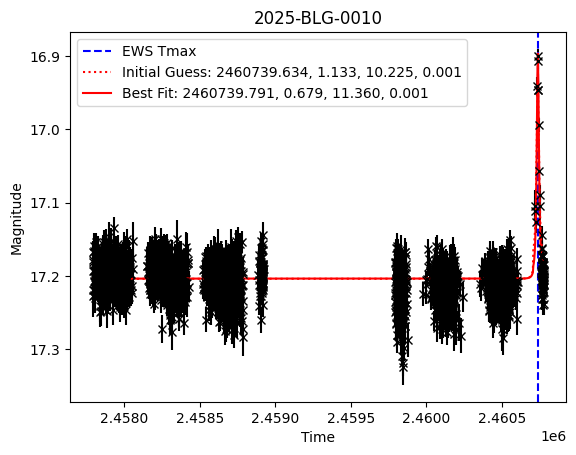


 2025-BLG-0010
-----------------
t_0: 2460739.791
u_0: 0.679
t_E: 11.360
rho: 0.001
-----------------
Time elapsed: 51.77792167663574 seconds
-----------------
FS: 37.92249077787394, FB: 44.96404714211106
chi2 =  7314.9518233659555
-----------------
Initial chi2: 7548.216595254231
Final chi2: 7314.9518233659555
Delta chi2: -233.2647718882754
Delta chi2/dof:  -0.06060399373558727
-----------------

 2025-BLG-0075
-----------------
t_0: 2460726.903
u_0: 0.000
t_E: 19.563
rho: 0.001
-----------------
Time elapsed: 52.295273542404175 seconds
-----------------
FS: 7.769907503037331, FB: 7.137032225022804
chi2 =  1131.1925757091103
-----------------
Initial chi2: 1131.8239114719763
Final chi2: 1131.1925757091103
Delta chi2: -0.6313357628660015
Delta chi2/dof:  -0.000887954659445853
-----------------


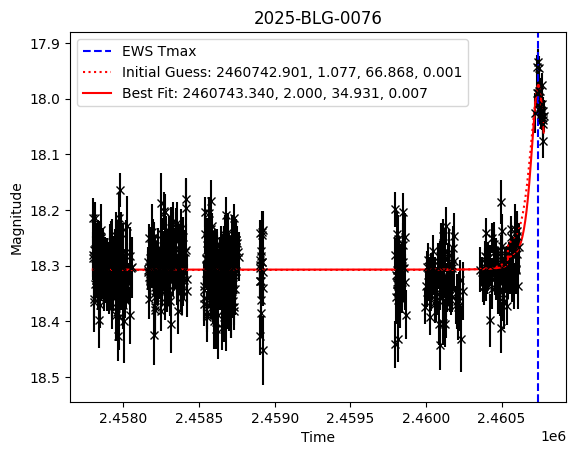


 2025-BLG-0076
-----------------
t_0: 2460743.340
u_0: 2.000
t_E: 34.931
rho: 0.007
-----------------
Time elapsed: 55.85742163658142 seconds
-----------------
FS: 176.3063213578123, FB: -146.30414964121027
chi2 =  1079.4905945639575
-----------------
Initial chi2: 1094.6916544499877
Final chi2: 1079.4905945639575
Delta chi2: -15.20105988603018
Delta chi2/dof:  -0.021024979095477427
-----------------

 2025-BLG-0011
-----------------
t_0: 2460746.244
u_0: 0.584
t_E: 14.158
rho: 0.001
-----------------
Time elapsed: 57.11826491355896 seconds
-----------------
FS: 16.803524053760277, FB: 5.701607083935356
chi2 =  12044.202733515507
-----------------
Initial chi2: 12094.755522021243
Final chi2: 12044.202733515507
Delta chi2: -50.552788505736316
Delta chi2/dof:  -0.013520403451654537
-----------------

 2025-BLG-0077
-----------------
t_0: 2460731.021
u_0: 0.330
t_E: 42.766
rho: 0.001
-----------------
Time elapsed: 58.33323621749878 seconds
-----------------
FS: 9.9285696589208, FB: 15.6

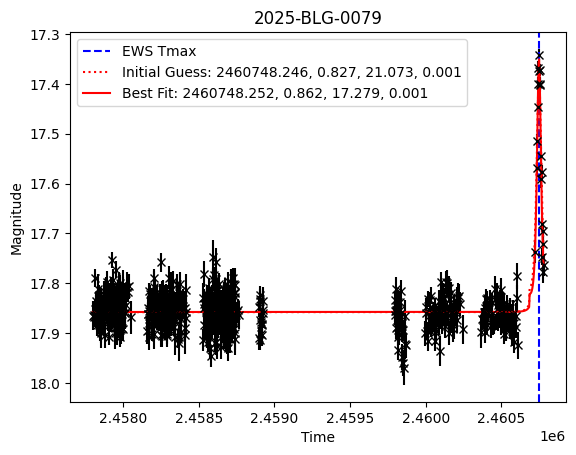


 2025-BLG-0079
-----------------
t_0: 2460748.252
u_0: 0.862
t_E: 17.279
rho: 0.001
-----------------
Time elapsed: 66.47162628173828 seconds
-----------------
FS: 58.50776344678037, FB: -13.122506080784483
chi2 =  1411.0726370278358
-----------------
Initial chi2: 1467.169665699359
Final chi2: 1411.0726370278358
Delta chi2: -56.097028671523276
Delta chi2/dof:  -0.08106507033457121
-----------------

 2025-BLG-0080
-----------------
t_0: 2460908.152
u_0: 2.000
t_E: 69.043
rho: 0.017
-----------------
Time elapsed: 70.68470883369446 seconds
-----------------
FS: 1439.8138627572182, FB: -1377.9421987516446
chi2 =  935.305340360483
-----------------
Initial chi2: 1022.374083770649
Final chi2: 935.305340360483
Delta chi2: -87.06874341016601
Delta chi2/dof:  -0.17518861853152115
-----------------


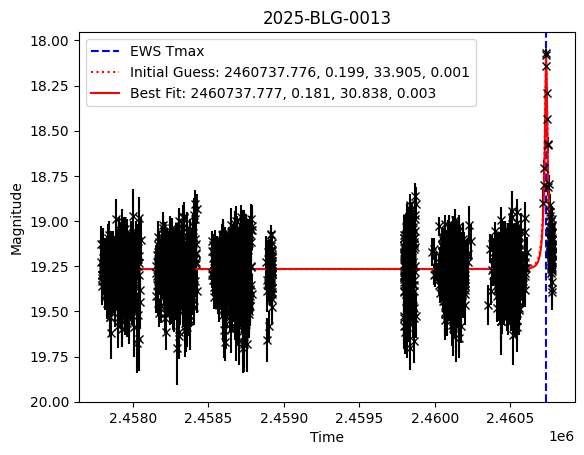


 2025-BLG-0013
-----------------
t_0: 2460737.777
u_0: 0.181
t_E: 30.838
rho: 0.003
-----------------
Time elapsed: 73.02795338630676 seconds
-----------------
FS: 5.357259081397277, FB: 7.053408669753986
chi2 =  7131.8887694306095
-----------------
Initial chi2: 7172.899178074332
Final chi2: 7131.8887694306095
Delta chi2: -41.01040864372226
Delta chi2/dof:  -0.01070767849705542

 -----------------2025-BLG-0081

-----------------
t_0: 2460751.814
u_0: 0.499
t_E: 61.636
rho: 0.002
-----------------
Time elapsed: 73.2772707939148 seconds
-----------------
FS: 65.29334349441038, FB: 432.05363739171514
chi2 =  
1252.428640792048-----------------
Initial chi2: 1333.2885339857428
Final chi2: 1252.428640792048
Delta chi2: -80.85989319369469
Delta chi2/dof:  -0.16302397821309414
-----------------


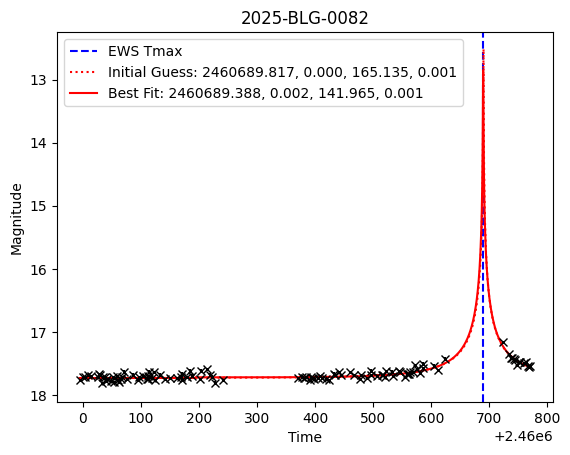


 2025-BLG-0082
-----------------
t_0: 2460689.388
u_0: 0.002
t_E: 141.965
rho: 0.001
-----------------
Time elapsed: 75.12391519546509 seconds
-----------------
FS: 9.248421468235847, FB: 41.68382743977939
chi2 =  627.0380494244332
-----------------
Initial chi2: 628.8275335822038
Final chi2: 627.0380494244332
Delta chi2: -1.7894841577706302
Delta chi2/dof:  -0.016569297757135466
-----------------

 2025-BLG-0083
-----------------
t_0: 2460725.576
u_0: 0.734
t_E: 20.602
rho: 0.001
-----------------
Time elapsed: 77.67399263381958 seconds
-----------------
FS: 27.085100932886288, FB: 79.27348556398557
chi2 =  334.881191617626
-----------------
Initial chi2: 397.45242412351195
Final chi2: 334.881191617626
Delta chi2: -62.57123250588597
Delta chi2/dof:  -0.42857008565675325
-----------------

 2025-BLG-0084
-----------------
t_0: 2460733.483
u_0: 0.455
t_E: 118.297
rho: 0.006
-----------------
Time elapsed: 79.52629351615906 seconds
-----------------
FS: 39.96442125884489, FB: -1.4425438

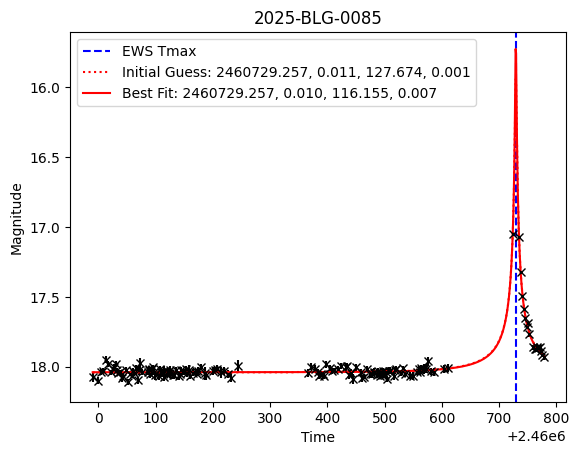


 2025-BLG-0085
-----------------
t_0: 2460729.257
u_0: 0.010
t_E: 116.155
rho: 0.007
-----------------
Time elapsed: 83.89874696731567 seconds
-----------------
FS: 2.847392783197895, FB: 35.54871294560634
chi2 =  179.10909691938286
-----------------
Initial chi2: 180.57633241944404
Final chi2: 179.10909691938286
Delta chi2: -1.4672355000611788
Delta chi2/dof:  -0.010049558219597115
-----------------

 2025-BLG-0086
-----------------
t_0: 2460687.850
u_0: 0.000
t_E: 42.925
rho: 0.001
-----------------
Time elapsed: 86.42217588424683 seconds
-----------------
FS: 159.02825320246092, FB: 134.22476096050977
chi2 =  192.4914359240903
-----------------
Initial chi2: 211.00758289183187
Final chi2: 192.4914359240903
Delta chi2: -18.516146967741577
Delta chi2/dof:  -0.19287653091397475
-----------------

 2025-BLG-0015
-----------------
t_0: 2460717.197
u_0: 0.286
t_E: 31.531
rho: 0.001
-----------------
Time elapsed: 87.0990662574768 seconds
-----------------
FS: 148.45385322385482, FB: -16.

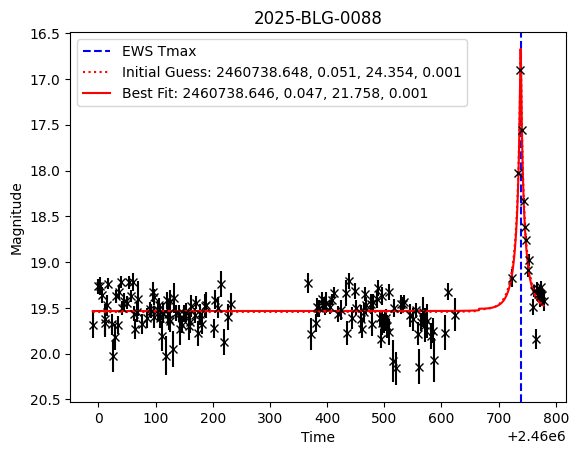


 2025-BLG-0088
-----------------
t_0: 2460738.646
u_0: 0.047
t_E: 21.758
rho: 0.001
-----------------
Time elapsed: 93.97975325584412 seconds
-----------------
FS: 6.274709431085828, FB: 3.407414297926782
chi2 =  432.510586385888
-----------------
Initial chi2: 477.1979347869635
Final chi2: 432.510586385888
Delta chi2: -44.687348401075496
Delta chi2/dof:  -0.31032880834080206
-----------------

 2025-BLG-0089
-----------------
t_0: 2460755.795
u_0: 0.467
t_E: 63.523
rho: 0.017
-----------------
Time elapsed: 96.21326160430908 seconds
-----------------
FS: 36.75532397316566, FB: 31.12227922574034
chi2 =  460.0243047037085
-----------------
Initial chi2: 492.84113269146997
Final chi2: 460.0243047037085
Delta chi2: -32.816827987761485
Delta chi2/dof:  -0.22632295163973437
-----------------

 2025-BLG-0090
-----------------
t_0: 2460770.022
u_0: 1.880
t_E: 23.673
rho: 0.011
-----------------
Time elapsed: 98.88993000984192 seconds
-----------------
FS: 727.1070224457089, FB: -662.95280551

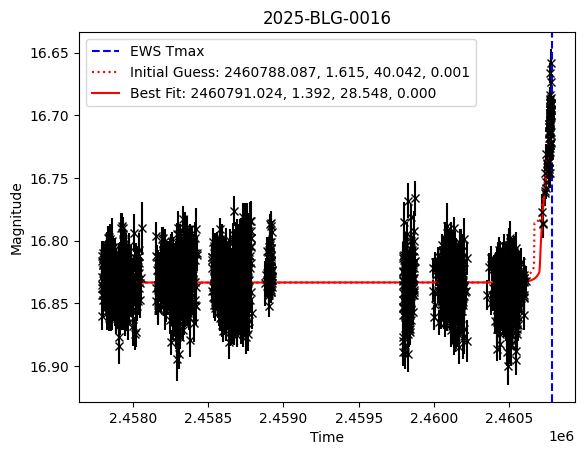

Final chi2: 373.1590129117079

Delta chi2: -89.7387123979529 
2025-BLG-0016Delta chi2/dof: 
 ------------------0.6231855027635618

t_0: 2460791.024-----------------

u_0: 1.392
t_E: 28.548
rho: 0.000
-----------------
Time elapsed: 99.15867924690247 seconds
-----------------
FS: 85.18061084896188, FB: 31.411513863373877
chi2 =  8555.962472880004
-----------------
Initial chi2: 8621.501484676735
Final chi2: 8555.962472880004
Delta chi2: -65.53901179673085
Delta chi2/dof:  -0.019219651553293502
-----------------


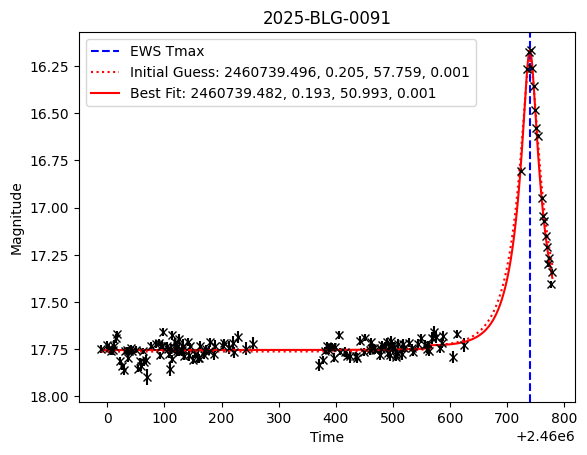


 2025-BLG-0091
-----------------
t_0: 2460739.482
u_0: 0.193
t_E: 50.993
rho: 0.001
-----------------
Time elapsed: 101.04912161827087 seconds
-----------------
FS: 39.04072093910455, FB: 10.877018679363704
chi2 =  481.34127559138466
-----------------
Initial chi2: 1063.759135206524
Final chi2: 481.34127559138466
Delta chi2: -582.4178596151394
Delta chi2/dof:  -3.9891634220215026
-----------------

 2025-BLG-0017
-----------------
t_0: 2460772.531
u_0: 0.277
t_E: 34.582
rho: 0.001
-----------------
Time elapsed: 103.36370849609375 seconds
-----------------
FS: 41.268869788275374, FB: 7.05847728941191
chi2 =  11179.737802785392

 -----------------
Initial chi2: 11992.501964163843
2025-BLG-0092Final chi2: 11179.737802785392

-----------------
Delta chi2: -812.7641613784508t_0: 2460736.540

u_0: 0.082
t_E: 57.269Delta chi2/dof: 
 rho: 0.001
------------------0.2103971424743595
Time elapsed: 103.66331672668457 seconds
-----------------
-----------------

FS: 106.78540879920993, FB: 4.7472

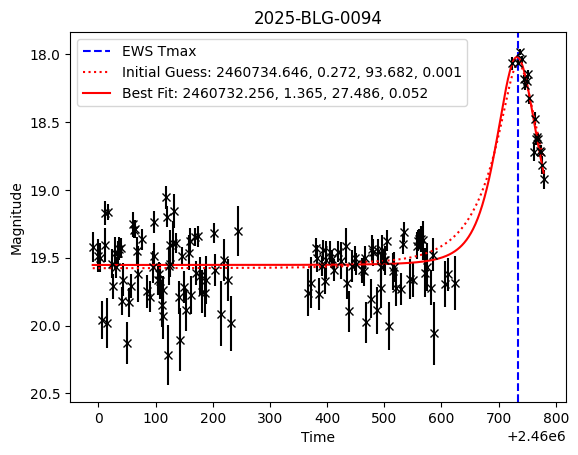


 2025-BLG-0094
-----------------
t_0: 2460732.256
u_0: 1.365
t_E: 27.486
rho: 0.052
-----------------
Time elapsed: 111.0728850364685 seconds
-----------------
FS: 175.14331016213123, FB: -165.62374403704848
chi2 =  509.87457553652854
-----------------
Initial chi2: 554.5328705629576
Final chi2: 509.87457553652854
Delta chi2: -44.658295026429016
Delta chi2/dof:  -0.32128269803186343
-----------------

 2025-BLG-0095
-----------------
t_0: 2460750.792
u_0: 0.045
t_E: 37.578
rho: 0.001
-----------------
Time elapsed: 115.21146583557129 seconds
-----------------
FS: 8.162671635186971, FB: 5.875701348617039
chi2 =  374.1034851177854
-----------------
Initial chi2: 406.8813372210003
Final chi2: 374.1034851177854
Delta chi2: -32.77785210321491
Delta chi2/dof:  -0.26433751696141056
-----------------

 2025-BLG-0018
-----------------
t_0: 2460721.851
u_0: 1.443
t_E: 27.176
rho: 0.004
-----------------
Time elapsed: 116.51591062545776 seconds
-----------------
FS: 156.49425517548184, FB: -98.6

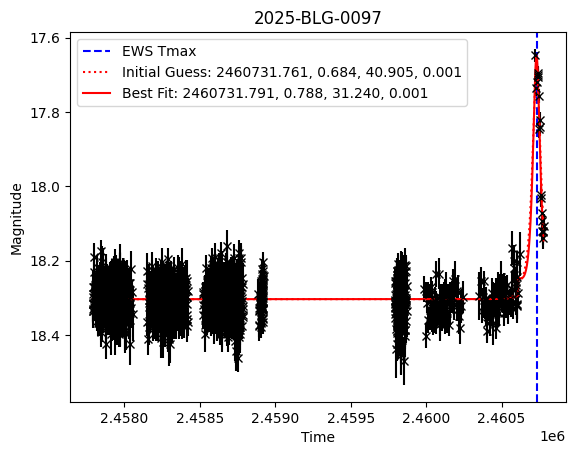


 2025-BLG-0097
-----------------
t_0: 2460731.791
u_0: 0.788
t_E: 31.240
rho: 0.001
-----------------
Time elapsed: 122.59517669677734 seconds
-----------------
FS: 45.60317487563679, FB: -15.516498979115198
chi2 =  3785.7809150014755
-----------------
Initial chi2: 3820.780142546797
Final chi2: 3785.7809150014755
Delta chi2: -34.999227545321446
Delta chi2/dof:  -0.013083823381428578
-----------------

 2025-BLG-0098
-----------------
t_0: 2460735.830
u_0: 0.019
t_E: 101.411
rho: 0.001
-----------------
Time elapsed: 130.5544376373291 seconds
-----------------
FS: 3.387959625595905, FB: 4.279367048517962
chi2 =  3947.015309608515
-----------------
Initial chi2: 4241.933667199772
Final chi2: 3947.015309608515
Delta chi2: -294.9183575912566
Delta chi2/dof:  -0.11226431579415935
-----------------


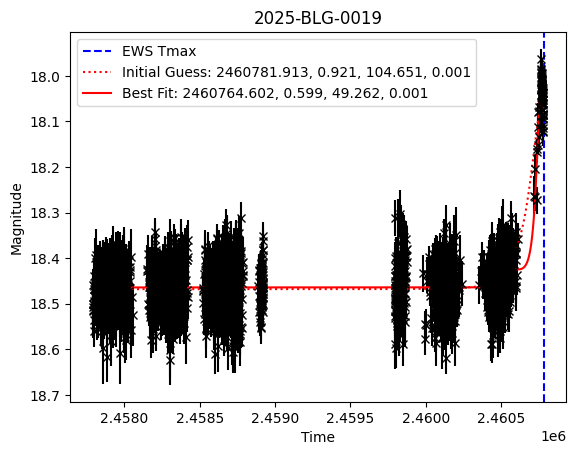


 2025-BLG-0019
-----------------
t_0: 2460764.602
u_0: 0.599
t_E: 49.262
rho: 0.001
-----------------
Time elapsed: 132.47481966018677 seconds
-----------------
FS: 14.820679083437604, FB: 11.140541937386194
chi2 =  5706.254702937897
-----------------
Initial chi2: 6231.5192639931465
Final chi2: 5706.254702937897
Delta chi2: -525.2645610552499
Delta chi2/dof:  -0.1362553984579118
-----------------

 2025-BLG-0099
-----------------
t_0: 2460742.849
u_0: 0.991
t_E: 7.711
rho: 0.001
-----------------
Time elapsed: 137.21578764915466 seconds
-----------------
FS: 56.15746779976115, FB: -32.550642818469015
chi2 =  6147.790459363658
-----------------
Initial chi2: 6177.715550855735
Final chi2: 6147.790459363658
Delta chi2: -29.925091492077627
Delta chi2/dof:  -0.011220506746185837
-----------------

 2025-BLG-0020
-----------------
t_0: 2460778.292
u_0: 0.147
t_E: 90.077
rho: 0.017
-----------------
Time elapsed: 145.2866451740265 seconds
-----------------
FS: 72.85654393272686, FB: 45.2476

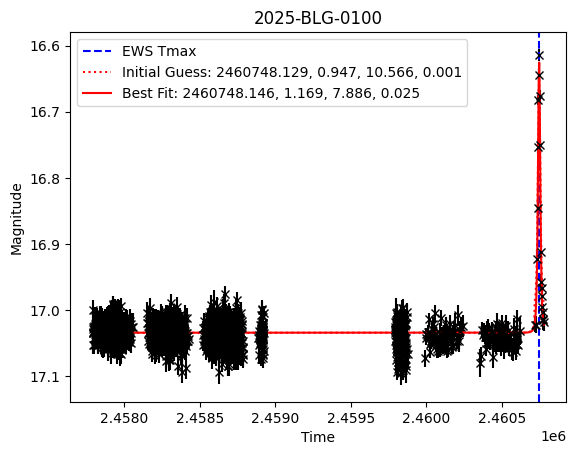


 2025-BLG-0100
-----------------
t_0: 2460748.146
u_0: 1.169
t_E: 7.886
rho: 0.025
-----------------
Time elapsed: 148.0742542743683 seconds
-----------------
FS: 183.33089249446778, FB: -86.4208141134338
chi2 =  3957.092522650106
-----------------
Initial chi2: 4072.8092403250744
Final chi2: 3957.092522650106
Delta chi2: -115.71671767496855
Delta chi2/dof:  -0.043258586046717215
-----------------

 2025-BLG-0021
-----------------
t_0: 2460745.734
u_0: 0.086
t_E: 17.643
rho: 0.001
-----------------
Time elapsed: 151.94037318229675 seconds
-----------------
FS: 6.866513837790066, FB: 13.08314514771614
chi2 =  6107.924729603504
-----------------
Initial chi2: 6133.587190793472
Final chi2: 6107.924729603504
Delta chi2: -25.66246118996787
Delta chi2/dof:  -0.006639705353161157
-----------------

 2025-BLG-0101
-----------------
t_0: 2460727.636
u_0: 1.352
t_E: 19.033
rho: 0.001
-----------------
Time elapsed: 153.73552131652832 seconds
-----------------
FS: 123.90720179305245, FB: -12.941

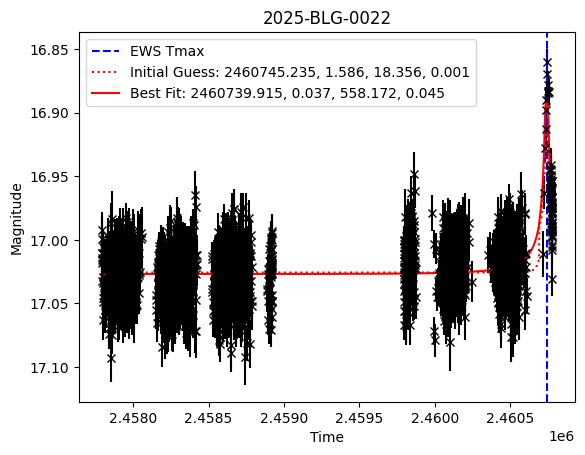


 2025-BLG-0022
-----------------
t_0: 2460739.915
u_0: 0.037
t_E: 558.172
rho: 0.045
-----------------
Time elapsed: 161.51861214637756 seconds
-----------------
FS: 0.3788215276202974, FB: 97.17435775002274
chi2 =  6755.02873424741
-----------------
Initial chi2: 7146.08250769806
Final chi2: 6755.02873424741
Delta chi2: -391.0537734506497
Delta chi2/dof:  -0.10188998787145641
-----------------


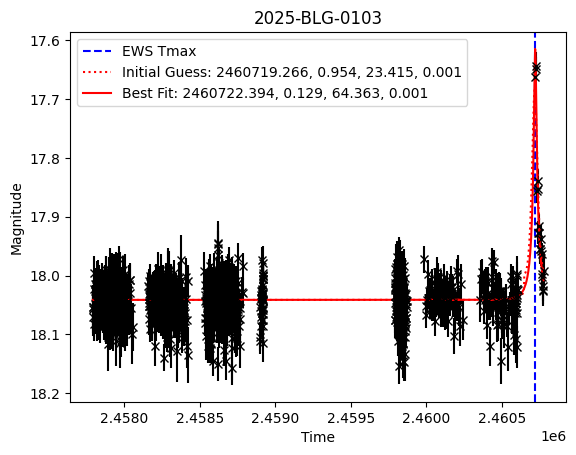


 2025-BLG-0103
-----------------
t_0: 2460722.394
u_0: 0.129
t_E: 64.363
rho: 0.001
-----------------
Time elapsed: 162.09834933280945 seconds
-----------------
FS: 2.7252332734074685, FB: 35.59657017370135
chi2 =  1925.8338214029295
-----------------
Initial chi2: 1952.7823439868664
Final chi2: 1925.8338214029295
Delta chi2: -26.948522583936892
Delta chi2/dof:  -0.019359570821793744
-----------------

 2025-BLG-0023
-----------------
t_0: 2460747.258
u_0: 0.029
t_E: 10.738
rho: 0.001
-----------------
Time elapsed: 165.0616853237152 seconds
-----------------
FS: 25.179288502665354, FB: 8.052135638319413
chi2 =  8183.491341689783
-----------------
Initial chi2: 8394.989461216508
Final chi2: 8183.491341689783
Delta chi2: -211.49811952672462
Delta chi2/dof:  
-0.05523586302604456
----------------- 
2025-BLG-0104
-----------------
t_0: 2460738.706
u_0: 0.115
t_E: 12.912
rho: 0.001
-----------------
Time elapsed: 165.2656192779541 seconds
-----------------
FS: 159.52999613657718, FB: 12.2

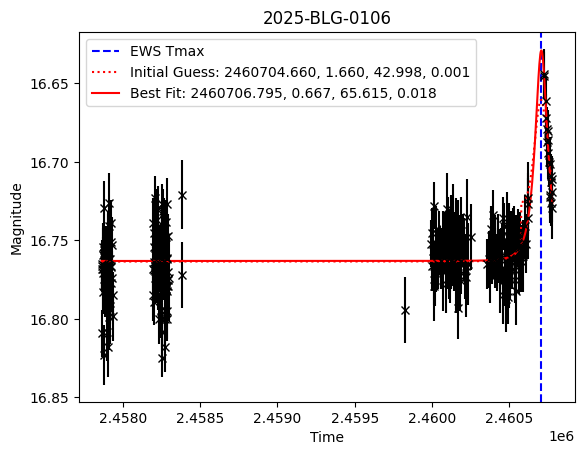


 2025-BLG-0106
-----------------
t_0: 2460706.795
u_0: 0.667
t_E: 65.615
rho: 0.018
-----------------
Time elapsed: 170.66658329963684 seconds
-----------------
FS: 22.14484734624494, FB: 102.24307195497212
chi2 =  321.8180233366525
-----------------
Initial chi2: 343.35545647786773
Final chi2: 321.8180233366525
Delta chi2: -21.537433141215217
Delta chi2/dof:  -0.0803635564970717
-----------------

 2025-BLG-0024
-----------------
t_0: 2460742.208
u_0: 0.539
t_E: 20.458
rho: 0.002
-----------------
Time elapsed: 171.19281649589539 seconds
-----------------
FS: 14.886305382834568, FB: 81.75350064213545
chi2 =  6492.895797507485
-----------------
Initial chi2: 6697.405577763174
Final chi2: 6492.895797507485
Delta chi2: -204.50978025568838
Delta chi2/dof:  -0.09117689712692305
-----------------

 2025-BLG-0107
-----------------
t_0: 2460694.444
u_0: 1.738
t_E: 37.722
rho: 0.033
-----------------
Time elapsed: 173.32686114311218 seconds
-----------------
FS: 130.60386436068296, FB: -100.0

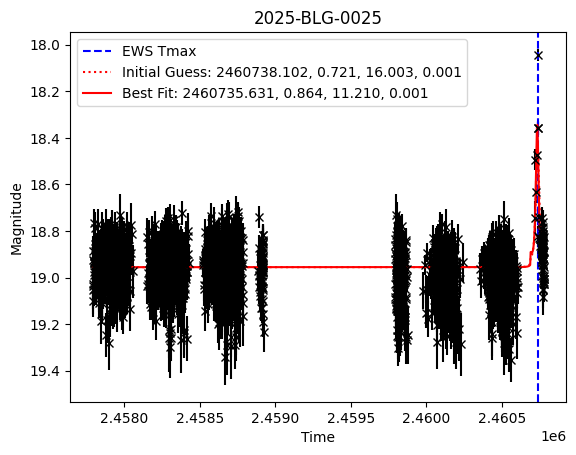


 2025-BLG-0025
-----------------
t_0: 2460735.631
u_0: 0.864
t_E: 11.210
rho: 0.001
-----------------
Time elapsed: 178.9783215522766 seconds
-----------------
FS: 27.62161811137606, FB: -11.107523138520476
chi2 =  7719.03515852002
-----------------
Initial chi2: 7763.620657887891
Final chi2: 7719.03515852002
Delta chi2: -44.58549936787131
Delta chi2/dof:  -0.011619885162332892
-----------------


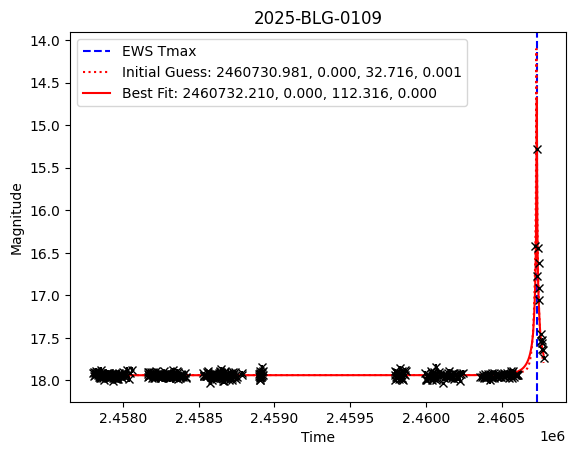


 2025-BLG-0109
-----------------
t_0: 2460732.210
u_0: 0.000
t_E: 112.316
rho: 0.000
-----------------
Time elapsed: 180.0013256072998 seconds
-----------------
FS: 6.4174123862662755, FB: 35.719823179207324
chi2 =  14107.469033401414
-----------------
Initial chi2: 18902.929727635088
Final chi2: 14107.469033401414
Delta chi2: -4795.460694233674
Delta chi2/dof:  -10.63295054153808
-----------------

 2025-BLG-0110
-----------------
t_0: 2460718.244
u_0: 0.135
t_E: 48.436
rho: 0.001
-----------------
Time elapsed: 182.05988812446594 seconds
-----------------
FS: 7.892391073825717, FB: 9.328032023234407
chi2 =  154.1810531071023
-----------------
Initial chi2: 159.23601145349775
Final chi2: 154.1810531071023
Delta chi2: -5.054958346395466
Delta chi2/dof:  -0.034861781699279074
-----------------

 2025-BLG-0111
-----------------
t_0: 2460751.601
u_0: 0.800
t_E: 21.197
rho: 0.001
-----------------
Time elapsed: 183.93924713134766 seconds
-----------------
FS: 26.203542822282056, FB: -4.98

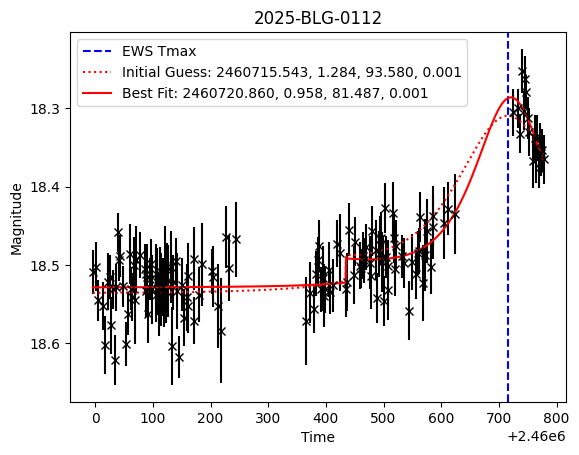


 2025-BLG-0112
-----------------
t_0: 2460720.860
u_0: 0.958
t_E: 81.487
rho: 0.001
-----------------
Time elapsed: 186.36982893943787 seconds
-----------------
FS: 16.183629103273077, FB: 8.281963913716709
chi2 =  125.84775644568336
-----------------
Initial chi2: 145.0709769855793
Final chi2: 125.84775644568336
Delta chi2: -19.223220539895948
Delta chi2/dof:  -0.1353747925344785
-----------------

 2025-BLG-0113
-----------------
t_0: 2460728.557
u_0: 0.078
t_E: 119.281
rho: 0.000
-----------------
Time elapsed: 188.8697168827057 seconds
-----------------
FS: 2.005860604452264, FB: 31.556768444079538
chi2 =  368.5366167649985
-----------------
Initial chi2: 407.6552448327824
Final chi2: 368.5366167649985
Delta chi2: -39.1186280677839
Delta chi2/dof:  -0.2679358086834514
-----------------

 2025-BLG-0114
-----------------
t_0: 2460785.348
u_0: 0.104
t_E: 48.134
rho: 0.037
-----------------
Time elapsed: 191.8505561351776 seconds
-----------------
FS: 53.42405459937994, FB: 24.9139005

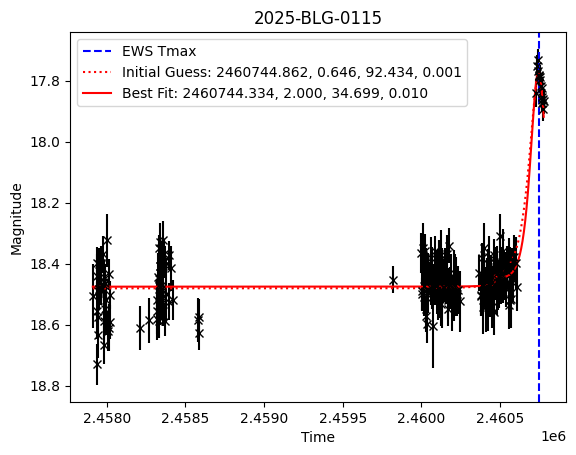


 2025-BLG-0115
-----------------
t_0: 2460744.334
u_0: 2.000
t_E: 34.699
rho: 0.010
-----------------
Time elapsed: 195.39419627189636 seconds
-----------------
FS: 387.24088989208934, FB: -361.5549442172521
chi2 =  258.10118710087227
-----------------
Initial chi2: 268.93950749615726
Final chi2: 258.10118710087227
Delta chi2: -10.838320395284995
Delta chi2/dof:  -0.048602333611143474
-----------------

 2025-BLG-0027
-----------------
t_0: 2460716.758
u_0: 1.883
t_E: 13.720
rho: 0.006
-----------------
Time elapsed: 197.4209017753601 seconds
-----------------
FS: 547.177439743843, FB: -443.0584037515007
chi2 =  8048.009572368801
-----------------
Initial chi2: 8422.7649496532
Final chi2: 8048.009572368801
Delta chi2: -374.7553772843985
Delta chi2/dof:  -0.0971372154702951
-----------------

 2025-BLG-0116
-----------------
t_0: 2460689.487
u_0: 0.124
t_E: 700.000
rho: 0.001
-----------------
Time elapsed: 198.19282388687134 seconds
-----------------
FS: 2.2493131230611105, FB: 130.85

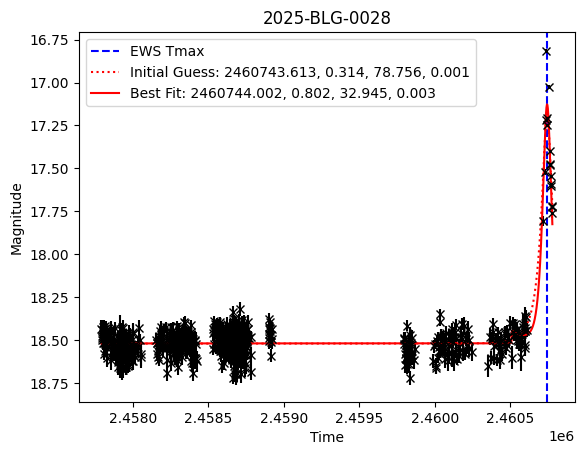


 2025-BLG-0028
-----------------
t_0: 2460744.002
u_0: 0.802
t_E: 32.945
rho: 0.003
-----------------
Time elapsed: 202.80582809448242 seconds
-----------------
FS: 121.4389995932432, FB: -96.78396181027834
chi2 =  3827.230678226543
-----------------
Initial chi2: 4000.8141646959857
Final chi2: 3827.230678226543
Delta chi2: -173.5834864694425
Delta chi2/dof:  -0.23713591047738047
-----------------


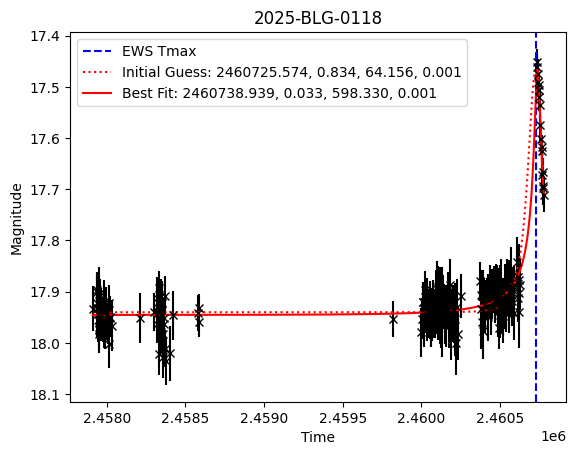


 2025-BLG-0118
-----------------
t_0: 2460738.939
u_0: 0.033
t_E: 598.330
rho: 0.001
-----------------
Time elapsed: 204.75191473960876 seconds
-----------------
FS: 0.8009634165716417, FB: 41.06237098241111
chi2 =  93.77414992967196
-----------------
Initial chi2: 120.40407895192882
Final chi2: 93.77414992967196
Delta chi2: -26.62992902225686
Delta chi2/dof:  -0.11941672207290072
-----------------

 2025-BLG-0029
-----------------


t_0: 2460695.180u_0: 0.204
t_E: 52.496 
2025-BLG-0119rho: 0.002
-----------------

-----------------t_0: 2460720.464
Time elapsed: 206.4937129020691 seconds

u_0: 0.000-----------------

t_E: 35.667FS: 268.4376255052053, FB: 57.50361288636037

chi2 = rho: 0.001 
1772.0889328677215-----------------

Time elapsed: 206.53803873062134 seconds
----------------------------------

FS: 67.50698768983882, FB: 148.44629539029552Initial chi2: 2211.7122092682157

Final chi2: 1772.0889328677215
chi2 = Delta chi2: -439.6232764004942 
293.86714385383686Delta chi2/dof: 


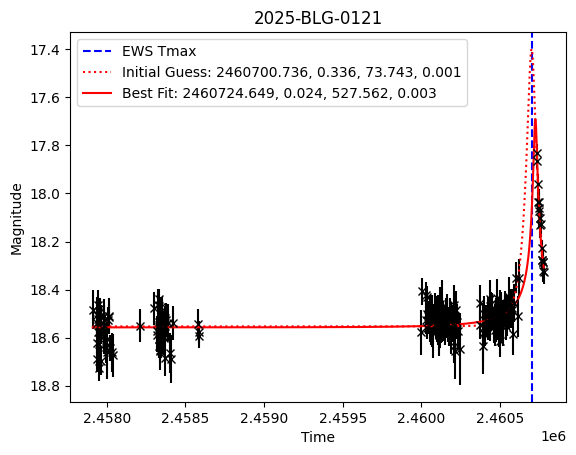


 2025-BLG-0121
-----------------
t_0: 2460724.649
u_0: 0.024
t_E: 527.562
rho: 0.003
-----------------
Time elapsed: 211.76205348968506 seconds
-----------------
FS: 0.7092305139295386, FB: 23.113777402978638
chi2 =  160.11829688758226
-----------------
Initial chi2: 169.05508615703258
Final chi2: 160.11829688758226
Delta chi2: -8.936789269450315
Delta chi2/dof:  -0.042154666365331675
-----------------


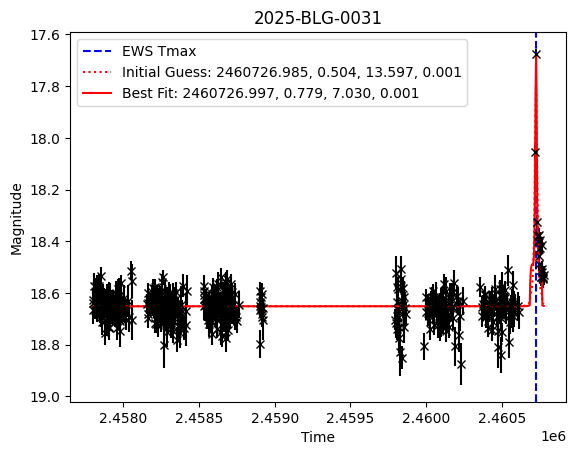


 2025-BLG-0031
-----------------
t_0: 2460726.997
u_0: 0.779
t_E: 7.030
rho: 0.001
-----------------
Time elapsed: 213.4107391834259 seconds
-----------------
FS: 55.92193502118986, FB: -34.08233633617219
chi2 =  818.502252418455
-----------------
Initial chi2: 939.7802506234935
Final chi2: 818.502252418455
Delta chi2: -121.27799820503856
Delta chi2/dof:  -0.24599999635910458
-----------------

 2025-BLG-0122
-----------------
t_0: 2460718.671
u_0: 0.301
t_E: 30.725
rho: 0.002
-----------------
Time elapsed: 214.06069016456604 seconds
-----------------
FS: 18.711509836377015, FB: 8.452157492149112
chi2 =  166.65943720710737
-----------------
Initial chi2: 202.34993219535613
Final chi2: 166.65943720710737
Delta chi2: -35.69049498824876
Delta chi2/dof:  -0.23793663325499173
-----------------

 2025-BLG-0123
-----------------
t_0: 2460735.248
u_0: 0.069
t_E: 46.097
rho: 0.001
-----------------
Time elapsed: 216.4523983001709 seconds
-----------------
FS: 13.211953693833491, FB: 3.5477991

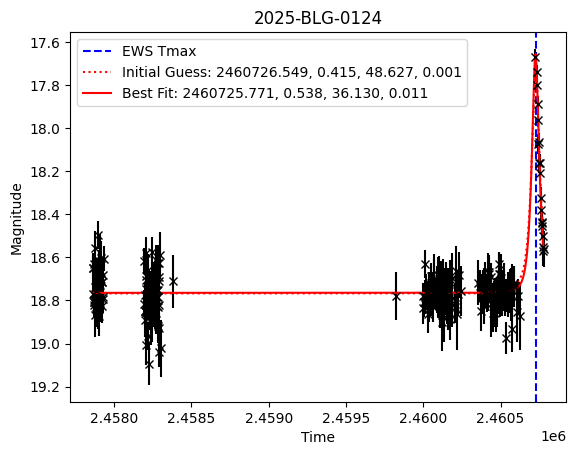


 2025-BLG-0124
-----------------
t_0: 2460725.771
u_0: 0.538
t_E: 36.130
rho: 0.011
-----------------
Time elapsed: 220.44708466529846 seconds
-----------------
FS: 33.12743127572116, FB: -13.44410214069889
chi2 =  296.7025761018324
-----------------
Initial chi2: 312.45071259311953
Final chi2: 296.7025761018324
Delta chi2: -15.748136491287141
Delta chi2/dof:  -0.05987884597447582
-----------------

 2025-BLG-0125
-----------------
t_0: 2460757.021
u_0: 0.909
t_E: 22.362
rho: 0.001
-----------------
Time elapsed: 222.16155576705933 seconds
-----------------
FS: 74.68159670835364, FB: 26.447359582026383
chi2 =  377.92264258108
-----------------
Initial chi2: 418.6042340767315
Final chi2: 377.92264258108
Delta chi2: -40.681591495651446
Delta chi2/dof:  -0.31054649996680495
-----------------


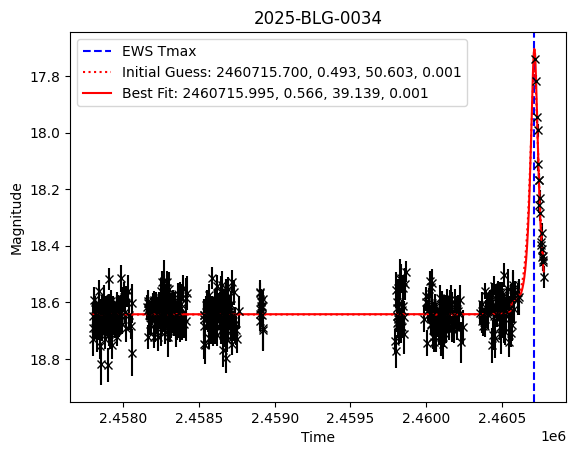


 2025-BLG-0034
-----------------
t_0: 2460715.995
u_0: 0.566
t_E: 39.139
rho: 0.001
-----------------
Time elapsed: 223.39760088920593 seconds
-----------------
FS: 31.14292439245357, FB: -9.107613572682466
chi2 =  676.9520574331528
-----------------
Initial chi2: 708.0006044767149
Final chi2: 676.9520574331528
Delta chi2: -31.048547043562053
Delta chi2/dof:  -0.06285130980478149
-----------------

 2025-BLG-0126
-----------------
t_0: 2460857.241
u_0: 0.000
t_E: 250.793
rho: 0.001
-----------------
Time elapsed: 224.50471901893616 seconds
-----------------
FS: 4.758993526462237, FB: 19.2817006475799
chi2 =  244.2454765887885
-----------------
Initial chi2: 252.34154415774924
Final chi2: 244.2454765887885
Delta chi2: -8.096067568960734
Delta chi2/dof:  -0.0550752895847669
-----------------


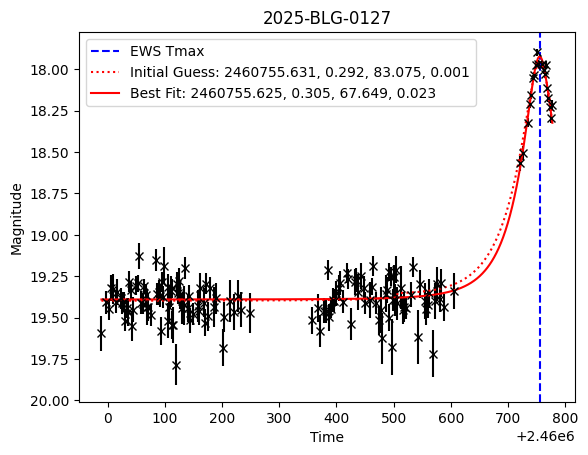


 2025-BLG-0127
-----------------
t_0: 2460755.625
u_0: 0.305
t_E: 67.649
rho: 0.023
-----------------
Time elapsed: 228.95623683929443 seconds
-----------------
FS: 13.201486495574446, FB: -2.139489546941525
chi2 =  284.83361851814897
-----------------
Initial chi2: 317.88329263849573
Final chi2: 284.83361851814897
Delta chi2: -33.049674120346765
Delta chi2/dof:  -0.2263676309612792
-----------------

 2025-BLG-0128
-----------------
t_0: 2460704.265
u_0: 0.454
t_E: 46.436
rho: 0.101
-----------------
Time elapsed: 231.8888852596283 seconds
-----------------
FS: 33.77935660980698, FB: 13.745676153240908
chi2 =  466.1836960677193
-----------------
Initial chi2: 501.5497604503024
Final chi2: 466.1836960677193
Delta chi2: -35.36606438258309
Delta chi2/dof:  -0.24058547199036115
-----------------

 2025-BLG-0035
-----------------
t_0: 2460714.024
u_0: 0.289
t_E: 62.585
rho: 0.001
-----------------
Time elapsed: 234.91435885429382 seconds
-----------------
FS: 20.015516663705363, FB: 5.711

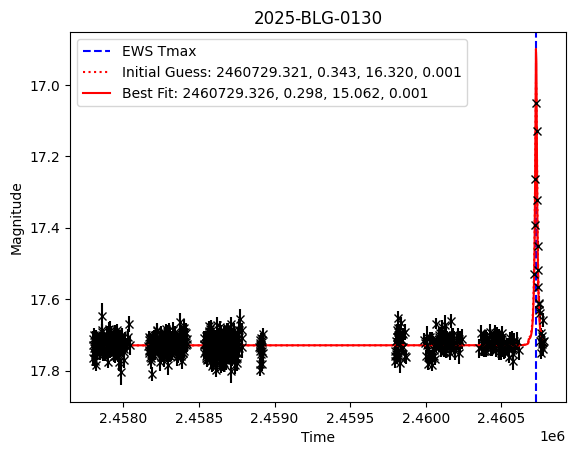


 2025-BLG-0130
-----------------
t_0: 2460729.326
u_0: 0.298
t_E: 15.062
rho: 0.001
-----------------
Time elapsed: 238.98387575149536 seconds
-----------------
FS: 24.75713224385327, FB: 26.333669599572854
chi2 =  1272.4737641640827
-----------------
Initial chi2: 1306.1905922564633
Final chi2: 1272.4737641640827
Delta chi2: -33.71682809238064
Delta chi2/dof:  -0.04241110451871778
-----------------

 2025-BLG-0131
-----------------
t_0: 2460763.505
u_0: 0.188
t_E: 50.441
rho: 0.001
-----------------
Time elapsed: 242.74657344818115 seconds
-----------------
FS: 49.36661358292916, FB: 169.5871752581704
chi2 =  1877.09610128868
-----------------
Initial chi2: 2773.777793656856
Final chi2: 1877.09610128868
Delta chi2: -896.6816923681758
Delta chi2/dof:  -1.1250711322059923
-----------------

 2025-BLG-0036
-----------------
t_0: 2460755.995
u_0: 0.165
t_E: 30.935
rho: 0.002
-----------------
Time elapsed: 243.20620369911194 seconds
-----------------
FS: 42.060018118375666, FB: 48.500937

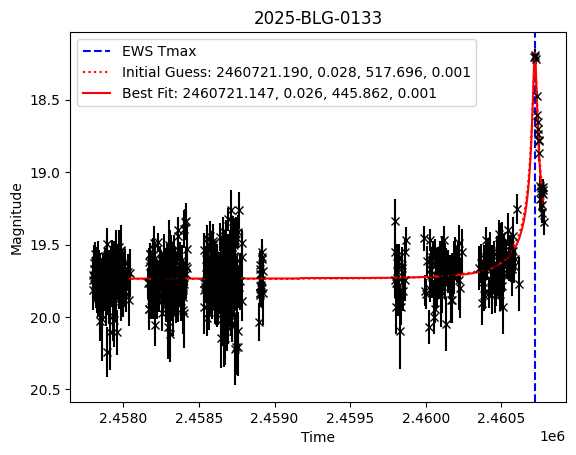


 2025-BLG-0133
-----------------
t_0: 2460721.147
u_0: 0.026
t_E: 445.862
rho: 0.001
-----------------
Time elapsed: 252.89350700378418 seconds
-----------------
FS: 0.7011320761755905, FB: 7.3516691272168915
chi2 =  1108.5045571328355
-----------------
Initial chi2: 1139.8919490952032
Final chi2: 1108.5045571328355
Delta chi2: -31.3873919623677
Delta chi2/dof:  -0.03998393880556395
-----------------


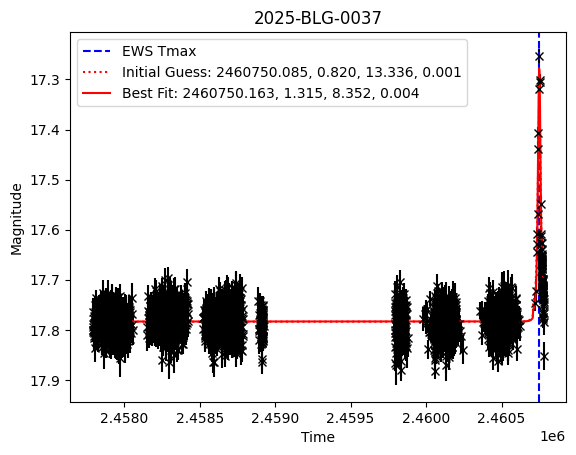


 2025-BLG-0037
-----------------
t_0: 2460750.163
u_0: 1.315
t_E: 8.352
rho: 0.004
-----------------
Time elapsed: 255.86895084381104 seconds
-----------------
FS: 158.10872838040828, FB: -109.50782201202206
chi2 =  5616.788644523569
-----------------
Initial chi2: 5836.9833378494495
Final chi2: 5616.788644523569
Delta chi2: -220.1946933258805
Delta chi2/dof:  -0.05737224943352801
-----------------

 2025-BLG-0134
-----------------
t_0: 2460727.549
u_0: 0.896
t_E: 9.607
rho: 0.000
-----------------
Time elapsed: 256.78986144065857 seconds
-----------------
FS: 17.69611972145428, FB: -6.355351000693381
chi2 =  410.9971977839295
-----------------
Initial chi2: 418.55149351573885
Final chi2: 410.9971977839295
Delta chi2: -7.554295731809361
Delta chi2/dof:  -0.014389134727255927
-----------------

 2025-BLG-0135
-----------------
t_0: 2460754.105
u_0: 0.731
t_E: 23.958
rho: 0.199
-----------------
Time elapsed: 260.86036014556885 seconds
-----------------
FS: 15.10556069164416, FB: 0.5583

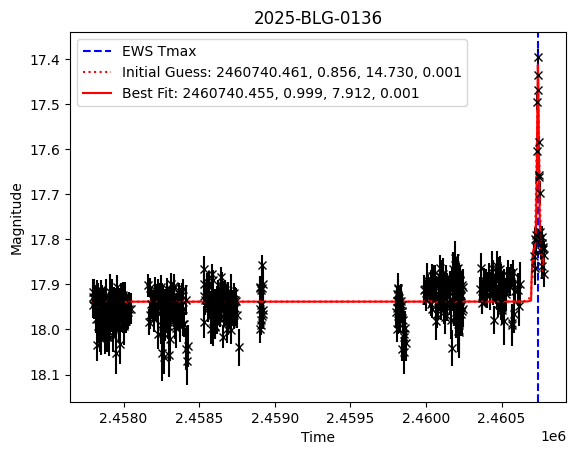


 2025-BLG-0136
-----------------
t_0: 2460740.455
u_0: 0.999
t_E: 7.912
rho: 0.001
-----------------
Time elapsed: 264.3549716472626 seconds
-----------------
FS: 74.15090216895292, FB: -32.018101957735645
chi2 =  807.7351991386489
-----------------
Initial chi2: 889.9228629602711
Final chi2: 807.7351991386489
Delta chi2: -82.18766382162221
Delta chi2/dof:  -0.15625031144795096
-----------------

 2025-BLG-0038
-----------------
t_0: 2460795.414
u_0: 2.000
t_E: 57.960
rho: 0.009
-----------------
Time elapsed: 264.9955129623413 seconds
-----------------
FS: 2475.273353452337, FB: -2021.7614984708378
chi2 =  13153.97734598121
-----------------
Initial chi2: 37288.33336875584
Final chi2: 13153.97734598121
Delta chi2: -24134.35602277463
Delta chi2/dof:  -6.286625689704254
-----------------

 2025-BLG-0137
-----------------
t_0: 2460789.122
u_0: 1.603
t_E: 107.692
rho: 0.003
-----------------
Time elapsed: 267.45736026763916 seconds
-----------------
FS: 110.10066297356347, FB: -69.287119

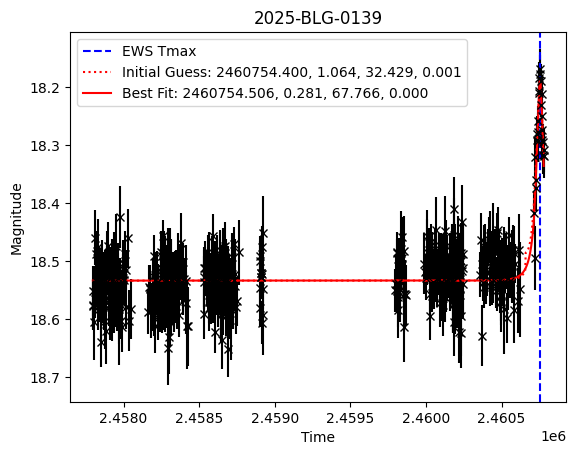


 2025-BLG-0139
-----------------
t_0: 2460754.506
u_0: 0.281
t_E: 67.766
rho: 0.000
-----------------
Time elapsed: 273.6843514442444 seconds
-----------------
FS: 3.2657402243009894, FB: 21.095828482719778
chi2 =  460.25172332494145
-----------------

 2025-BLG-0039Initial chi2: 467.00018312373993

-----------------Final chi2: 460.25172332494145

Delta chi2: -6.7484597987984785
t_0: 2460727.306
Delta chi2/dof: u_0: 0.613 
-0.012781173861360755
-----------------t_E: 7.701

rho: 0.045
-----------------
Time elapsed: 273.85139989852905 seconds
-----------------
FS: 58.071954010154286, FB: -43.22065077621233
chi2 =  6873.162756605438
-----------------
Initial chi2: 6941.306179503738
Final chi2: 6873.162756605438
Delta chi2: -68.14342289830074
Delta chi2/dof:  -0.01847706694639391
-----------------

 2025-BLG-0140
-----------------
t_0: 2460661.195
u_0: 0.000
t_E: 40.305
rho: 0.001
-----------------
Time elapsed: 275.5163519382477 seconds
-----------------
FS: 221.79438619238064, FB: 312.

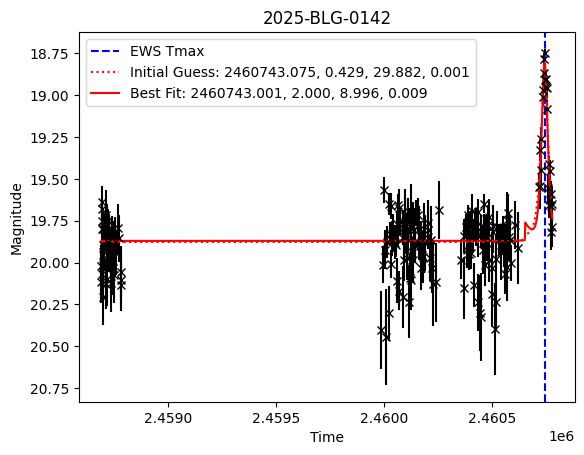


 2025-BLG-0142
-----------------
t_0: 2460743.001
u_0: 2.000
t_E: 8.996
rho: 0.009
-----------------
Time elapsed: 282.658650636673 seconds
-----------------
FS: 195.37487487930457, FB: -188.26538900527683
chi2 =  335.5596174545494
-----------------
Initial chi2: 354.81049402782037
Final chi2: 335.5596174545494
Delta chi2: -19.250876573270943
Delta chi2/dof:  -0.10462432920255947
-----------------


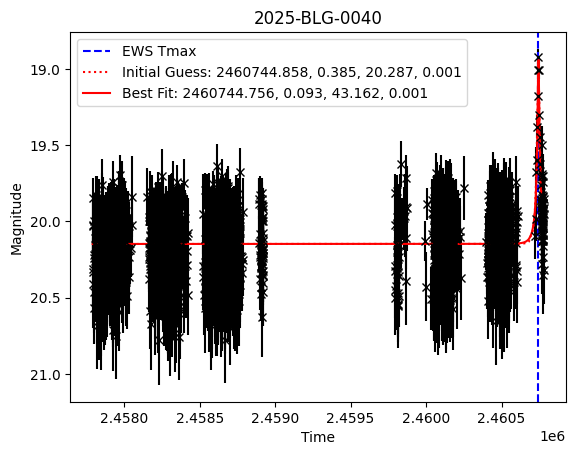


 2025-BLG-0040
-----------------
t_0: 2460744.756
u_0: 0.093
t_E: 43.162
rho: 0.001
-----------------
Time elapsed: 283.6120319366455 seconds
-----------------
FS: 1.2108546242751597, FB: 4.296877898152146
chi2 =  3624.247705078199
-----------------
Initial chi2: 3641.6254131656983
Final chi2: 3624.247705078199
Delta chi2: -17.377708087499286
Delta chi2/dof:  -0.005833403184793315
-----------------

 2025-BLG-0143
-----------------
t_0: 2460733.592
u_0: 0.093
t_E: 37.221
rho: 0.001
-----------------
Time elapsed: 284.58786368370056 seconds
-----------------
FS: 8.64308316896802, FB: 16.20306002192645
chi2 =  279.37614020181087
-----------------
Initial chi2: 451.1214935713185
Final chi2: 279.37614020181087
Delta chi2: -171.74535336950765
Delta chi2/dof:  -0.8718038242106988
-----------------

 2025-BLG-0144
-----------------
t_0: 2460718.105
u_0: 0.505
t_E: 59.756
rho: 0.005
-----------------
Time elapsed: 287.604736328125 seconds
-----------------
FS: 6.892240407012232, FB: 0.4458871

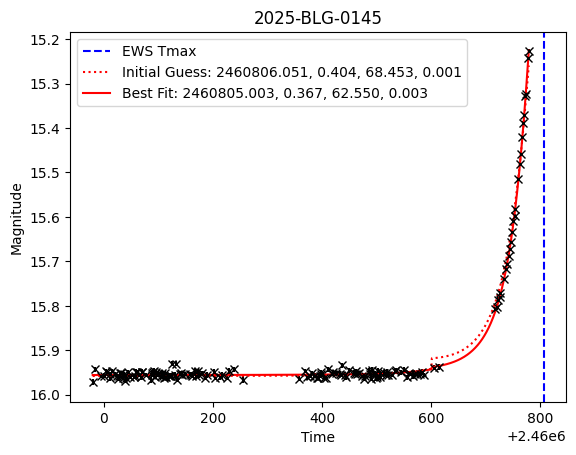


 2025-BLG-0145
-----------------
t_0: 2460805.003
u_0: 0.367
t_E: 62.550
rho: 0.003
-----------------
Time elapsed: 290.90527725219727 seconds
-----------------
FS: 250.35666654629063, FB: 11.265743678501725
chi2 =  247.9407500157667
-----------------
Initial chi2: 741.1099416957017
Final chi2: 247.9407500157667
Delta chi2: -493.16919167993495
Delta chi2/dof:  -3.0823074479995936
-----------------

 2025-BLG-0041
-----------------
t_0: 2460738.302
u_0: 0.288
t_E: 10.607
rho: 0.001
-----------------
Time elapsed: 292.9927124977112 seconds
-----------------
FS: 8.899673712966583, FB: 16.30592706528537
chi2 =  7903.893251420634
-----------------
Initial chi2: 7915.111314947478
Final chi2: 7903.893251420634
Delta chi2: -11.218063526843252
Delta chi2/dof:  -0.0029069871797987178
-----------------

 2025-BLG-0146
-----------------
t_0: 2460749.363
u_0: 0.167
t_E: 51.552
rho: 0.000
-----------------
Time elapsed: 294.0846457481384 seconds
-----------------
FS: 2.5216544263496115, FB: 15.9202

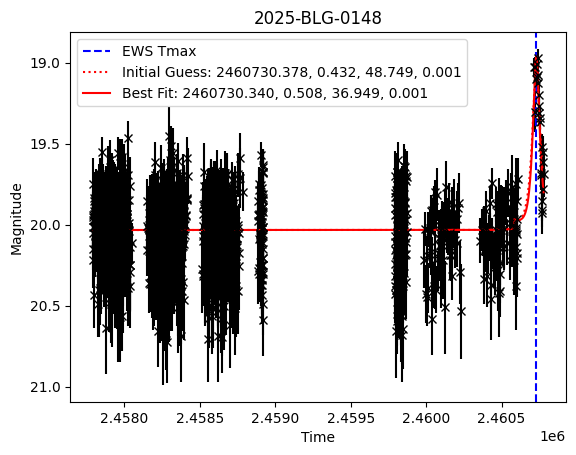


 2025-BLG-0148
-----------------
t_0: 2460730.340
u_0: 0.508
t_E: 36.949
rho: 0.001
-----------------
Time elapsed: 306.2777490615845 seconds
-----------------
FS: 8.921443472175659, FB: -2.802183353338032
chi2 =  4183.15514156404
-----------------
Initial chi2: 4191.986160265248

Final chi2: 4183.15514156404 
2025-BLG-0042
-----------------
Delta chi2: -8.83101870120845t_0: 2460759.347

Delta chi2/dof: u_0: 0.516
 -0.003831244555838807t_E: 63.812

-----------------rho: 0.003

-----------------
Time elapsed: 306.47457003593445 seconds
-----------------
FS: 45.10895614301578, FB: 115.84550524644499
chi2 =  8571.104583582288
-----------------
Initial chi2: 8762.888078033255
Final chi2: 8571.104583582288
Delta chi2: -191.78349445096683
Delta chi2/dof:  -0.04968484312201213
-----------------

 2025-BLG-0149
-----------------
t_0: 2460740.218
u_0: 0.645
t_E: 5.040
rho: 0.001
-----------------
Time elapsed: 310.08862137794495 seconds
-----------------
FS: 71.98257984432283, FB: 64.908140423

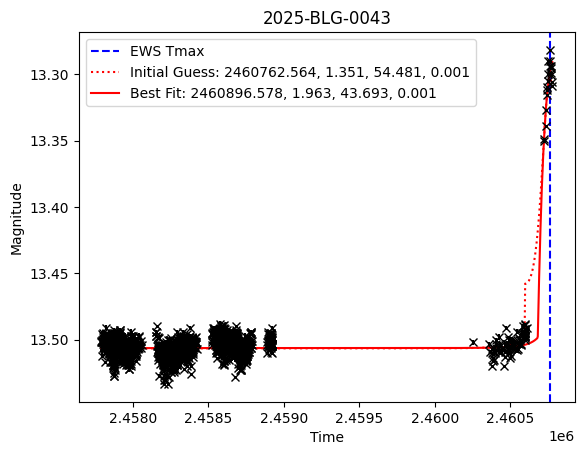


 2025-BLG-0043
-----------------
t_0: 2460896.578
u_0: 1.963
t_E: 43.693
rho: 0.001
-----------------
Time elapsed: 317.33441495895386 seconds
-----------------
FS: 8015.058723954097, FB: -5517.628201233912
chi2 =  81706.55886072191
-----------------
Initial chi2: 91428.36096204282
Final chi2: 81706.55886072191
Delta chi2: -9721.802101320907
Delta chi2/dof:  -4.045693758352438
-----------------

 2025-BLG-0044
-----------------
t_0: 2460754.760
u_0: 0.630
t_E: 22.177
rho: 0.001
-----------------
Time elapsed: 328.20764923095703 seconds
-----------------
FS: 35.78888935299402, FB: -17.299246302104187
chi2 =  4166.051865282021
-----------------
Initial chi2: 4195.231855253474
Final chi2: 4166.051865282021
Delta chi2: -29.179989971453324
Delta chi2/dof:  -0.010883994767420113
-----------------


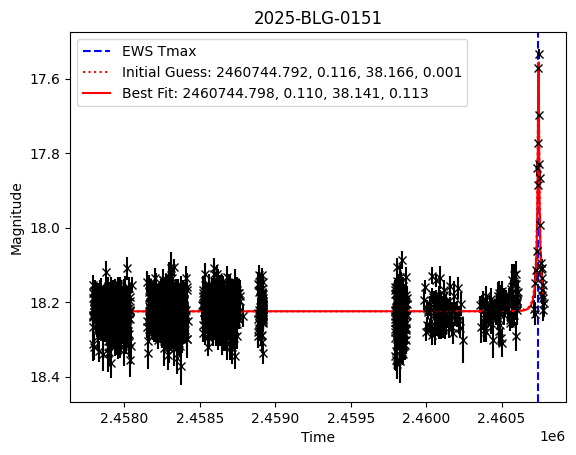


 2025-BLG-0151
-----------------
t_0: 2460744.798
u_0: 0.110
t_E: 38.141
rho: 0.113
-----------------
Time elapsed: 328.70924377441406 seconds
-----------------
FS: 2.6610061174830864, FB: 29.714783721977284
chi2 =  4812.01201294426
-----------------
Initial chi2: 4840.365932388331
Final chi2: 4812.01201294426
Delta chi2: -28.353919444070925
Delta chi2/dof:  -0.01193346777949113
-----------------

 2025-BLG-0152
-----------------
t_0: 2460743.101
u_0: 0.190
t_E: 41.646
rho: 0.001
-----------------
Time elapsed: 332.6565282344818 seconds
-----------------
FS: 3.722031363687714, FB: 6.786223132087176
chi2 =  969.4518009014687
-----------------
Initial chi2: 986.8002985355951
Final chi2: 969.4518009014687
Delta chi2: -17.348497634126375
Delta chi2/dof:  -0.023571328307236922
-----------------

 2025-BLG-0153
-----------------
t_0: 2460753.826

u_0: 0.121
t_E: 24.042rho: 0.001
-----------------
Time elapsed: 334.5256977081299 seconds
-----------------
FS: 95.64321398931943, FB: -9.3463936

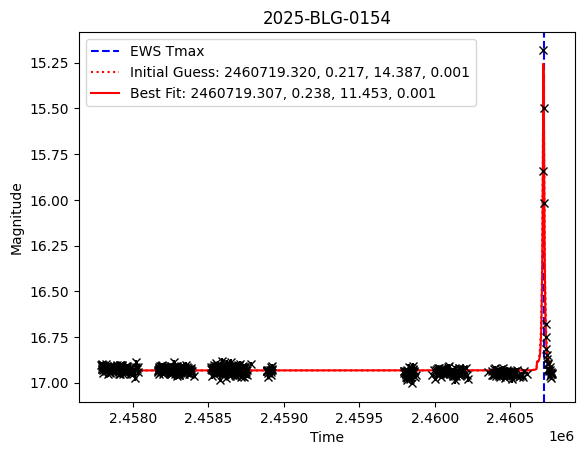


 2025-BLG-0154
-----------------
t_0: 2460719.307
u_0: 0.238
t_E: 11.453
rho: 0.001
-----------------
Time elapsed: 338.44464230537415 seconds
-----------------
FS: 132.8409772021681, FB: -26.440713587857044
chi2 =  1776.69461016444
-----------------
Initial chi2: 2543.8664611636523
Final chi2: 1776.69461016444
Delta chi2: -767.1718509992122
Delta chi2/dof:  -1.1820829753454734
-----------------

 2025-BLG-0155
-----------------
t_0: 2460748.105
u_0: 0.010
t_E: 25.099
rho: 0.001
-----------------
Time elapsed: 342.2182710170746 seconds
-----------------
FS: 11.840192552271333, FB: 0.8496758342841344
chi2 =  1620.647176995072
-----------------
Initial chi2: 2051.579382990889
Final chi2: 1620.647176995072
Delta chi2: -430.93220599581696
Delta chi2/dof:  -0.6147392382251312
-----------------


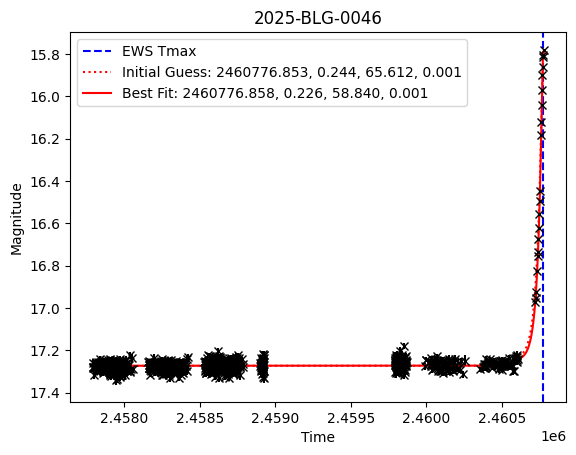


 2025-BLG-0046
-----------------
t_0: 2460776.858
u_0: 0.226
t_E: 58.840
rho: 0.001
-----------------
Time elapsed: 347.30380749702454 seconds
-----------------
FS: 64.85250647760547, FB: 12.95495865984811
chi2 =  2530.1289739666877
-----------------
Initial chi2: 3823.8767053586744
Final chi2: 2530.1289739666877
Delta chi2: -1293.7477313919867
Delta chi2/dof:  -0.9727426551819449
-----------------

 2025-BLG-0156
-----------------
t_0: 2460784.399
u_0: 0.159
t_E: 23.401
rho: 0.003
-----------------
Time elapsed: 348.27326917648315 seconds
-----------------
FS: 239.68484493148026, FB: 65.55266836958829
chi2 =  1538.8688185771211
-----------------
Initial chi2: 2222.6413795500544
Final chi2: 1538.8688185771211
Delta chi2: -683.7725609729332
Delta chi2/dof:  -0.9617054303416782
-----------------


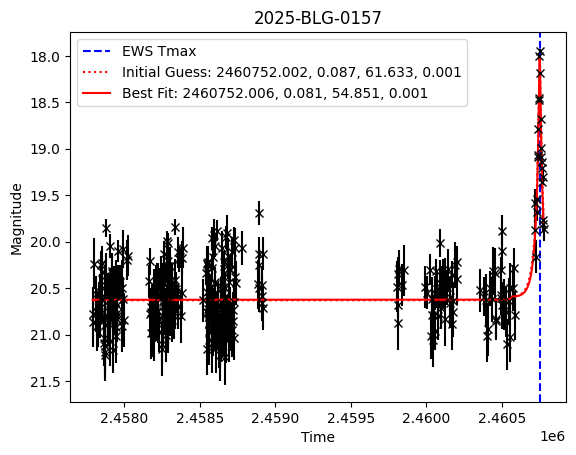


 2025-BLG-0157
-----------------
t_0: 2460752.006
u_0: 0.081
t_E: 54.851
rho: 0.001
-----------------
Time elapsed: 352.3279330730438 seconds
-----------------
FS: 3.2496892720826906, FB: 0.2976178297602271
chi2 =  897.8054346825459
-----------------
Initial chi2: 935.147960416323
Final chi2: 897.8054346825459
Delta chi2: -37.342525733777165
Delta chi2/dof:  -0.10430873109993621
-----------------

 2025-BLG-0047
-----------------
t_0: 2460671.667
u_0: 1.948
t_E: 31.108
rho: 0.026
-----------------
Time elapsed: 355.2066128253937 seconds
-----------------
FS: 405.7261002682187, FB: -382.48071910801434
chi2 =  3460.792588041041
-----------------
Initial chi2: 3483.155894657766
Final chi2: 3460.792588041041
Delta chi2: -22.363306616724913
Delta chi2/dof:  -0.016347446357255054
-----------------

 2025-BLG-0158
-----------------
t_0: 2460731.177
u_0: 0.044
t_E: 17.255
rho: 0.001
-----------------
Time elapsed: 356.63901233673096 seconds
-----------------
FS: 53.69101525280879, FB: 1.36133

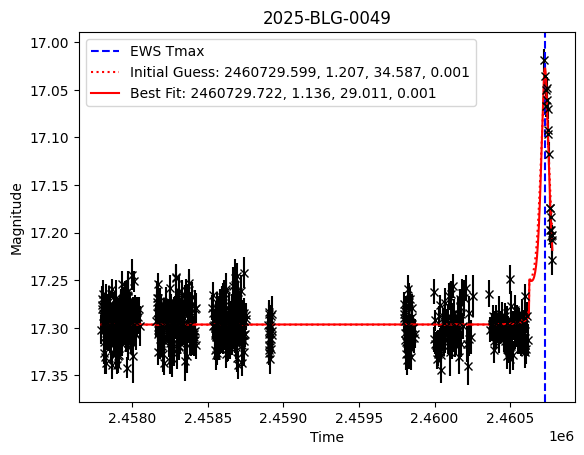


 2025-BLG-0049
-----------------
t_0: 2460729.722
u_0: 1.136
t_E: 29.011
rho: 0.001
-----------------
Time elapsed: 364.8001980781555 seconds
-----------------
FS: 81.18183346390227, FB: -5.083324810492944
chi2 =  1298.3554458627732
-----------------
Initial chi2: 1338.7856798184348
Final chi2: 1298.3554458627732
Delta chi2: -40.430233955661606
Delta chi2/dof:  -0.0556890274871372
-----------------

 2025-BLG-0050
-----------------
t_0: 2460760.109
u_0: 0.520
t_E: 23.466
rho: 0.001
-----------------
Time elapsed: 367.4439306259155 seconds
-----------------
FS: 93.82071332291771, FB: 56.4637396029907
chi2 =  209.37978938370293
-----------------
Initial chi2: 438.4888526594945
Final chi2: 209.37978938370293
Delta chi2: -229.10906327579158
Delta chi2/dof:  -1.5172785647403415
-----------------


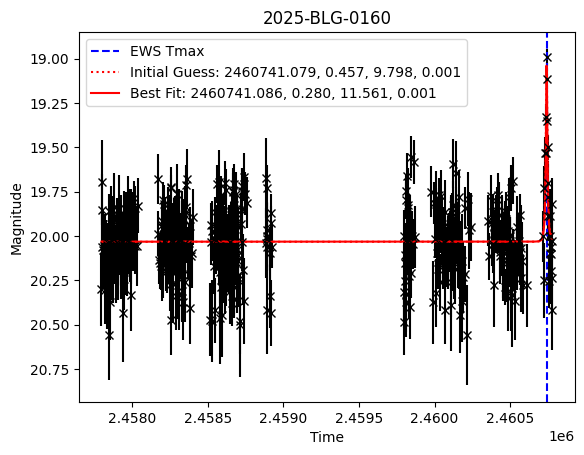


 2025-BLG-0160
-----------------
t_0: 2460741.086
u_0: 0.280
t_E: 11.561
rho: 0.001
-----------------
Time elapsed: 370.6834237575531 seconds
-----------------
FS: 3.627074011656579, FB: 2.5017047378605324
chi2 =  708.7018223757799
-----------------
Initial chi2: 712.4127420501104
Final chi2: 708.7018223757799
Delta chi2: -3.710919674330512
Delta chi2/dof:  -0.007588792790041946
-----------------

 2025-BLG-0051
-----------------
t_0: 2460794.317
u_0: 0.800
t_E: 28.071
rho: 0.007
-----------------
Time elapsed: 371.4617021083832 seconds
-----------------
FS: 119.11949335512982, FB: -111.1241358882676
chi2 =  103.07713058605313
-----------------
Initial chi2: 187.5250567956129
Final chi2: 103.07713058605313
Delta chi2: -84.44792620955977
Delta chi2/dof:  -0.9179122414082583
-----------------

 2025-BLG-0161
-----------------
t_0: 2460732.340
u_0: 0.303
t_E: 139.834
rho: 0.010
-----------------
Time elapsed: 375.7252514362335 seconds
-----------------
FS: 3.0772687511221997, FB: 39.0109

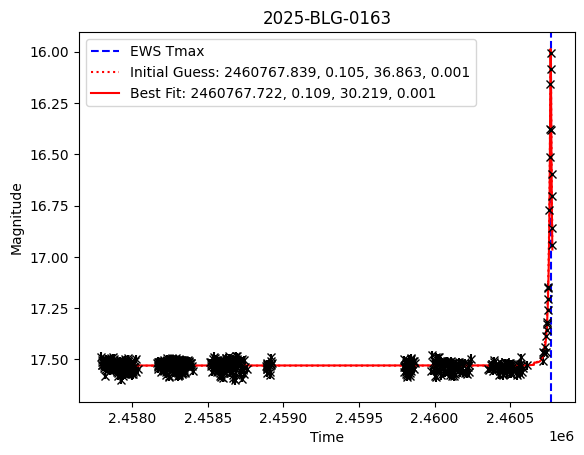


 2025-BLG-0163
-----------------
t_0: 2460767.722
u_0: 0.109
t_E: 30.219
rho: 0.001
-----------------
Time elapsed: 386.8096914291382 seconds
-----------------
FS: 24.107732440168522, FB: 37.30224414341995
chi2 =  1291.0246968190856
-----------------
Initial chi2: 1803.5834890984772
Final chi2: 1291.0246968190856
Delta chi2: -512.5587922793916
Delta chi2/dof:  -0.775429337790305
-----------------

 2025-BLG-0164
-----------------
t_0: 2460743.617
u_0: 0.009
t_E: 700.000
rho: 0.005
-----------------
Time elapsed: 391.5957329273224 seconds
-----------------
FS: 3.0128865922846773, FB: 430.39442858806535
chi2 =  80121.2118259101
-----------------
Initial chi2: 97652.06395836498
Final chi2: 80121.2118259101
Delta chi2: -17530.85213245488
Delta chi2/dof:  -26.243790617447424
-----------------

 2025-BLG-0165
-----------------
t_0: 2460736.947
u_0: 0.126
t_E: 17.303
rho: 0.001
-----------------
Time elapsed: 393.386830329895 seconds
-----------------
FS: 5.283016038727661, FB: -0.8150283382

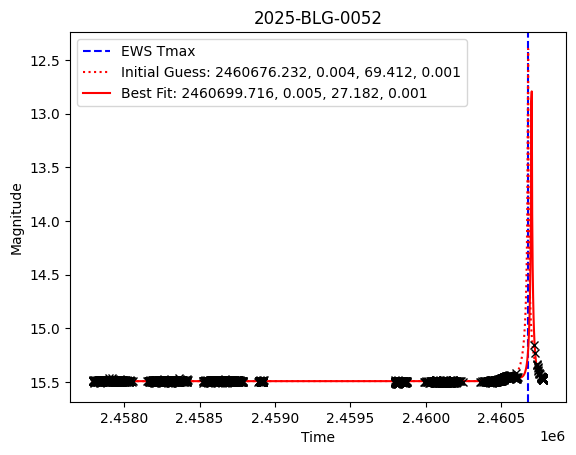


 2025-BLG-0052
-----------------
t_0: 2460699.716
u_0: 0.005
t_E: 27.182
rho: 0.001
-----------------
Time elapsed: 394.1689691543579 seconds
-----------------
FS: 246.01675284727852, FB: 154.29031258594077
chi2 =  9887.431905264742
-----------------
Initial chi2: 16895.26419779243
Final chi2: 9887.431905264742
Delta chi2: -7007.832292527686
Delta chi2/dof:  -1.848544524539089
-----------------


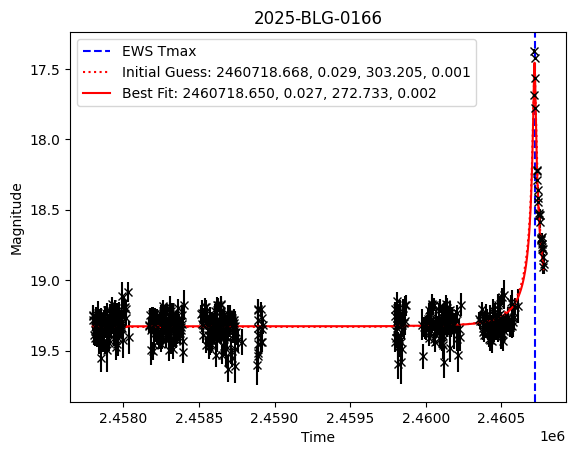


 2025-BLG-0166
-----------------
t_0: 2460718.650
u_0: 0.027
t_E: 272.733
rho: 0.002
-----------------
Time elapsed: 399.56378269195557 seconds
-----------------
FS: 1.478666250277244, FB: 10.23983512586205
chi2 =  990.137138048337
-----------------
Initial chi2: 1061.896519378723
Final chi2: 990.137138048337
Delta chi2: -71.75938133038608
Delta chi2/dof:  -0.14125862466611433
-----------------

 2025-BLG-0167
-----------------
t_0: 2460753.346
u_0: 0.732
t_E: 13.302
rho: 0.001
-----------------
Time elapsed: 402.3290674686432 seconds
-----------------
FS: 267.93365765509145, FB: 303.02980023616936
chi2 =  3341.6186442497155
-----------------
Initial chi2: 4440.400929775472
Final chi2: 3341.6186442497155
Delta chi2: -1098.7822855257564
Delta chi2/dof:  -2.1844578241068717
-----------------

 2025-BLG-0168
-----------------
t_0: 2460823.618
u_0: 0.371
t_E: 184.981
rho: 0.001
-----------------
Time elapsed: 405.570200920105 seconds
-----------------
FS: 26.126640229613262, FB: 180.94059

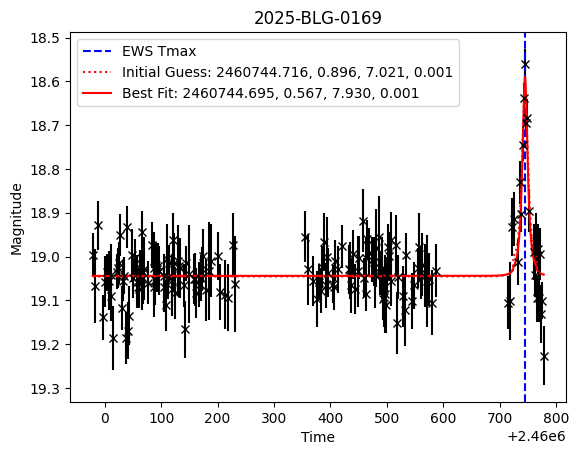


 2025-BLG-0169
-----------------
t_0: 2460744.695
u_0: 0.567
t_E: 7.930
rho: 0.001
-----------------
Time elapsed: 409.3697671890259 seconds
-----------------
FS: 8.182781236787136, FB: 7.035333704935784
chi2 =  133.97376373521277
-----------------
Initial chi2: 137.77764877427487
Final chi2: 133.97376373521277
Delta chi2: -3.803885039062095
Delta chi2/dof:  -0.02438387845552625
-----------------

 2025-BLG-0170
-----------------
t_0: 2460738.576
u_0: 0.024
t_E: 103.624
rho: 0.002
-----------------
Time elapsed: 412.411896944046 seconds
-----------------
FS: 8.899764704884783, FB: 1.8935417962591103
chi2 =  196.79188395588312
-----------------
Initial chi2: 1161.871533125456
Final chi2: 196.79188395588312
Delta chi2: -965.0796491695728
Delta chi2/dof:  -6.701942008122034
-----------------

 2025-BLG-0171
-----------------
t_0: 2460766.782
u_0: 2.000
t_E: 34.751
rho: 0.005
-----------------
Time elapsed: 418.7670533657074 seconds
-----------------
FS: 291.1999859011002, FB: -222.473415

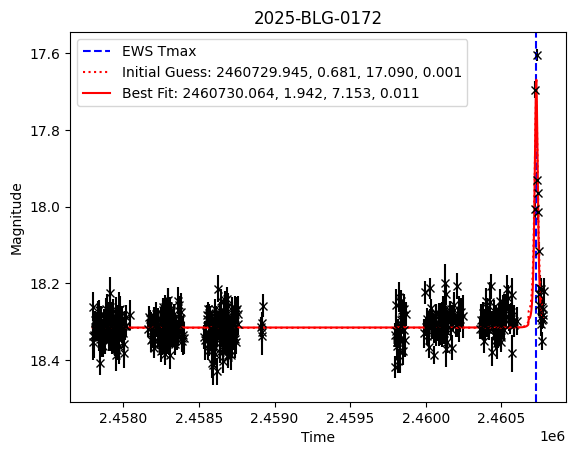


 2025-BLG-0172
-----------------
t_0: 2460730.064
u_0: 1.942
t_E: 7.153
rho: 0.011
-----------------
Time elapsed: 424.84062099456787 seconds
-----------------
FS: 369.5747692781705, FB: -339.8014694890005
chi2 =  1016.4028159180041
-----------------
Initial chi2: 1064.4535994419916
Final chi2: 1016.4028159180041
Delta chi2: -48.05078352398755
Delta chi2/dof:  -0.09496202277467895
-----------------

 2025-BLG-0173
-----------------
t_0: 2460781.978
u_0: 0.191
t_E: 46.688
rho: 0.001
-----------------
Time elapsed: 428.3788015842438 seconds
-----------------
FS: 14.91376251071168, FB: 56.22675765302055
chi2 =  678.6723583131783
-----------------
Initial chi2: 748.9169974479255
Final chi2: 678.6723583131783
Delta chi2: -70.24463913474722
Delta chi2/dof:  -0.13854958409220358
-----------------

 2025-BLG-0174
-----------------
t_0: 2460744.760
u_0: 0.125
t_E: 20.841
rho: 0.001
-----------------
Time elapsed: 433.3363928794861 seconds
-----------------
FS: 7.718825834723237, FB: 2.89571337

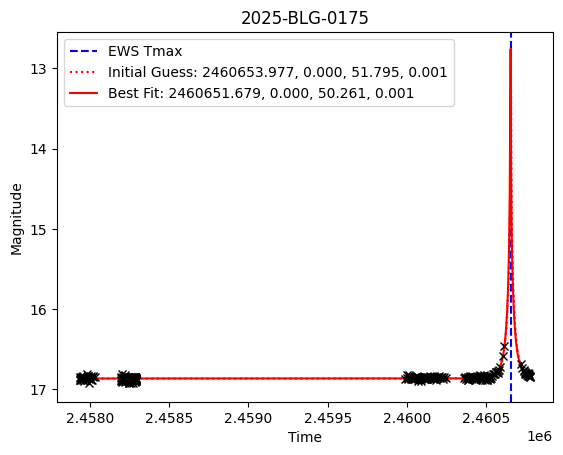


 2025-BLG-0175
-----------------
t_0: 2460651.679
u_0: 0.000
t_E: 50.261
rho: 0.001
-----------------
Time elapsed: 439.3952775001526 seconds
-----------------
FS: 86.99644274626311, FB: 26.33795613931594
chi2 =  336.18751176533306
-----------------
Initial chi2: 344.1098178106881
Final chi2: 336.18751176533306
Delta chi2: -7.9223060453550715
Delta chi2/dof:  -0.03131346262986194
-----------------


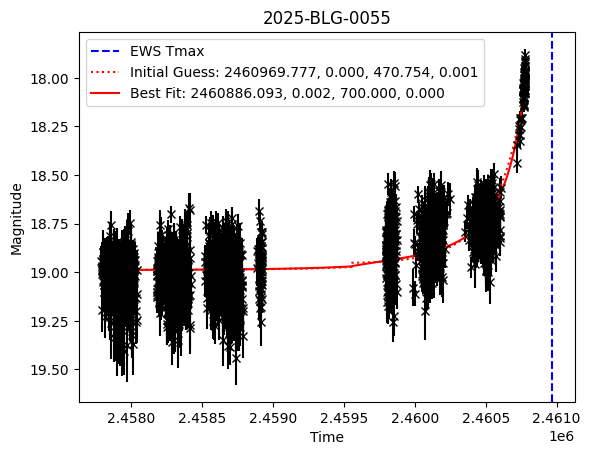


 2025-BLG-0055
-----------------
t_0: 2460886.093
u_0: 0.002
t_E: 700.000
rho: 0.000
-----------------
Time elapsed: 439.9963629245758 seconds
-----------------
FS: 4.224832472790373, FB: 11.77248771872056
chi2 =  9356.882065778267
-----------------
Initial chi2: 10193.96527435712
Final chi2: 9356.882065778267
Delta chi2: -837.0832085788534
Delta chi2/dof:  -0.22203798636043856
-----------------

 2025-BLG-0176
-----------------
t_0: 2460743.240
u_0: 0.102
t_E: 28.133
rho: 0.001
-----------------
Time elapsed: 441.4223966598511 seconds
-----------------
FS: 8.902338879296643, FB: -2.7365472078693274
chi2 =  243.59309768844443
-----------------
Initial chi2: 376.62579901309095
Final chi2: 243.59309768844443
Delta chi2: -133.03270132464652
Delta chi2/dof:  -0.9502335808903323
-----------------

 2025-BLG-0177
-----------------
t_0: 2460738.557
u_0: 2.000
t_E: 52.634
rho: 0.013
-----------------
Time elapsed: 446.427693605423 seconds
-----------------
FS: 318.16522058759057, FB: -243.626

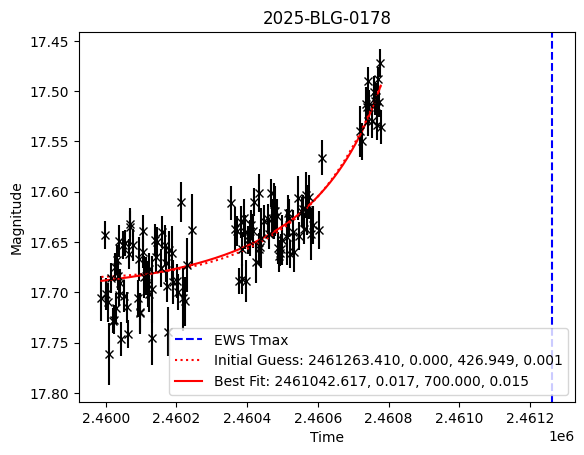


 2025-BLG-0178
-----------------
t_0: 2461042.617
u_0: 0.017
t_E: 700.000
rho: 0.015
-----------------
Time elapsed: 450.4902138710022 seconds
-----------------
FS: 6.293198340987168, FB: 45.913222816426995
chi2 =  320.9927327962097
-----------------
Initial chi2: 326.17500712374925
Final chi2: 320.9927327962097
Delta chi2: -5.182274327539574
Delta chi2/dof:  -0.042828713450740276
-----------------

 2025-BLG-0056
-----------------
t_0: 2460736.214
u_0: 0.326
t_E: 13.027
rho: 0.001
-----------------
Time elapsed: 451.3862476348877 seconds
-----------------
FS: 33.98625762498994, FB: 31.04613146132686
chi2 =  7586.466763635489
-----------------
Initial chi2: 7728.59924913443
Final chi2: 7586.466763635489
Delta chi2: -142.1324854989407
Delta chi2/dof:  -0.0377209356419694
-----------------

 2025-BLG-0057
-----------------
t_0: 2460741.457
u_0: 0.050
t_E: 44.050
rho: 0.000
-----------------
Time elapsed: 465.0513219833374 seconds
-----------------
FS: 6.075489498868585, FB: 140.46338909

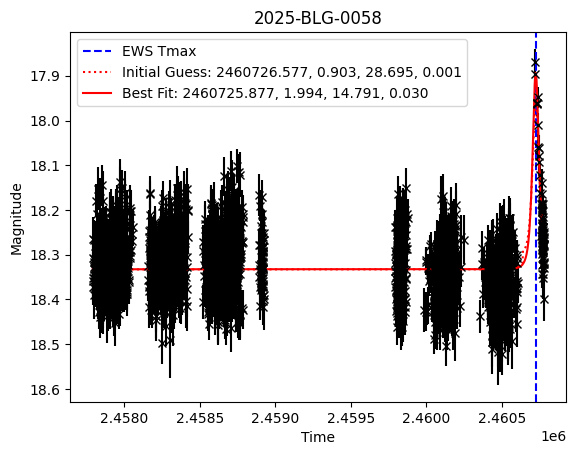


 2025-BLG-0058
-----------------
t_0: 2460725.877
u_0: 1.994
t_E: 14.791
rho: 0.030
-----------------
Time elapsed: 478.45283365249634 seconds
-----------------
FS: 238.57396361791797, FB: -209.2650934068164
chi2 =  7765.92664272963
-----------------
Initial chi2: 7816.952699141655
Final chi2: 7765.92664272963
Delta chi2: -51.026056412025355
Delta chi2/dof:  -0.01336810490228592


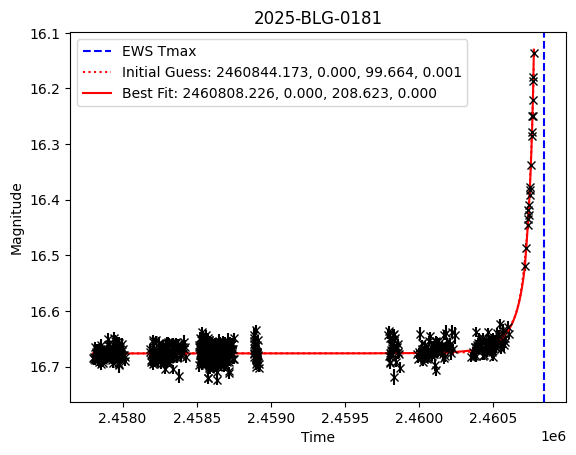

-----------------

 2025-BLG-0181
-----------------
t_0: 2460808.226
u_0: 0.000
t_E: 208.623
rho: 0.000
-----------------
Time elapsed: 478.7544183731079 seconds
-----------------
FS: 14.46233655887841, FB: 120.25441988172688
chi2 =  1608.2213688542747
-----------------
Initial chi2: 1705.4535384792891
Final chi2: 1608.2213688542747
Delta chi2: -97.23216962501442
Delta chi2/dof:  -0.12895513212866633
-----------------

 2025-BLG-0182
-----------------
t_0: 2460773.732
u_0: 1.040
t_E: 28.111
rho: 0.001
-----------------
Time elapsed: 482.6657223701477 seconds
-----------------
FS: 685.5727494338746, FB: -131.8557718407133
chi2 =  1352.1863049128024
-----------------
Initial chi2: 2362.152749861477
Final chi2: 1352.1863049128024
Delta chi2: -1009.9664449486745
Delta chi2/dof:  -1.327156957882621
-----------------

 2025-BLG-0183
-----------------
t_0: 2460742.350
u_0: 0.000
t_E: 30.014
rho: 0.001
-----------------
Time elapsed: 483.99442315101624 seconds
-----------------
FS: 1.713173057

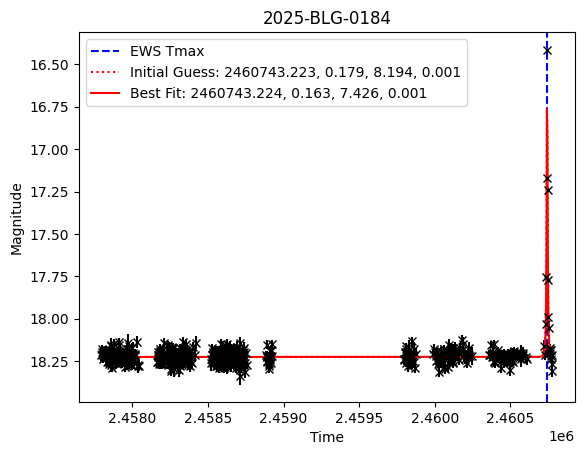


 2025-BLG-0184
-----------------
t_0: 2460743.224
u_0: 0.163
t_E: 7.426
rho: 0.001
-----------------
Time elapsed: 488.1309380531311 seconds
-----------------
FS: 27.792998736205366, FB: 4.56715025963697
chi2 =  1008.1855185580015
-----------------
Initial chi2: 1236.8304254047666
Final chi2: 1008.1855185580015
Delta chi2: -228.64490684676514
Delta chi2/dof:  -0.33041171509648143
-----------------

 2025-BLG-0185
-----------------
t_0: 2460692.100
u_0: 0.000
t_E: 37.238
rho: 0.002
-----------------
Time elapsed: 491.9898042678833 seconds
-----------------
FS: 171.2489538845349, FB: 7.035164268250183
chi2 =  1590.6389910429903
-----------------
Initial chi2: 1657.8861238623533
Final chi2: 1590.6389910429903
Delta chi2: -67.24713281936306
Delta chi2/dof:  -0.09661944370598141
-----------------

 2025-BLG-0060
-----------------
t_0: 2460748.262
u_0: 1.371
t_E: 15.932
rho: 0.019
-----------------
Time elapsed: 493.9836847782135 seconds
-----------------
FS: 13315.365098185483, FB: -12791.

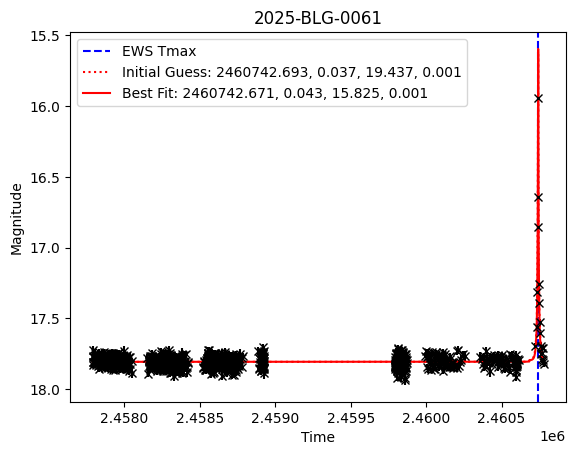


 2025-BLG-0061
-----------------
t_0: 2460742.671
u_0: 0.043
t_E: 15.825
rho: 0.001
-----------------
Time elapsed: 499.1267960071564 seconds
-----------------
FS: 15.027740884325503, FB: 32.57504205219781
chi2 =  3454.213703472865
-----------------
Initial chi2: 3504.2731118640454
Final chi2: 3454.213703472865
Delta chi2: -50.05940839118057
Delta chi2/dof:  -0.035988072171948646
-----------------


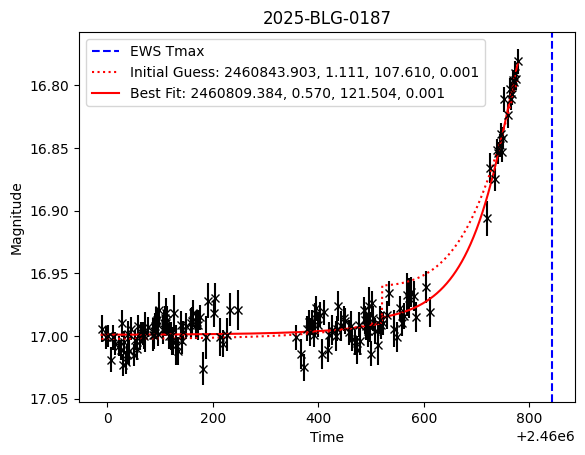


 2025-BLG-0187
-----------------
t_0: 2460809.384
u_0: 0.570
t_E: 121.504
rho: 0.001
-----------------
Time elapsed: 500.01028776168823 seconds
-----------------
FS: 26.77180011749936, FB: 73.29959999608732
chi2 =  152.7147348218541
-----------------
Initial chi2: 236.0583375777526
Final chi2: 152.7147348218541
Delta chi2: -83.3436027558985
Delta chi2/dof:  -0.5869267799711162
-----------------

 2025-BLG-0188
-----------------
t_0: 2460799.808
u_0: 0.371
t_E: 70.124
rho: 0.001
-----------------
Time elapsed: 504.3421280384064 seconds
-----------------
FS: 53.55743648576128, FB: 53.66590700140961
chi2 =  
 135.66346971934058
2025-BLG-0062-----------------

Initial chi2: 202.29469649341496-----------------

t_0: 2460746.053
u_0: 0.018
Final chi2: 135.66346971934058t_E: 41.367
rho: 0.001
-----------------

Time elapsed: 504.48401975631714 seconds
-----------------
Delta chi2: -66.63122677407438FS: 5.017785153530899, FB: 4.669056136825126

chi2 = Delta chi2/dof:  2916.2824340578527 
-0.4

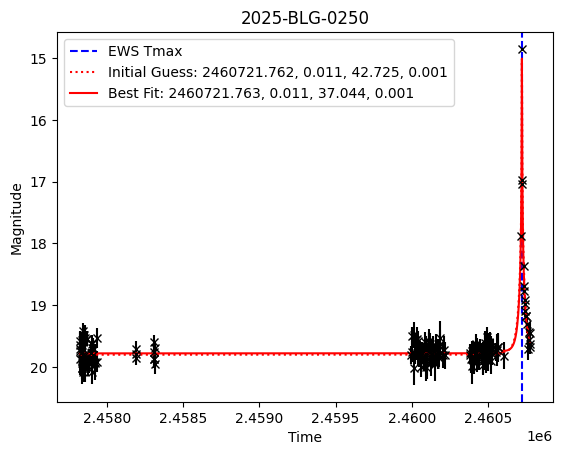


 2025-BLG-0250
-----------------
t_0: 2460721.763
u_0: 0.011
t_E: 37.044
rho: 0.001
-----------------
Time elapsed: 512.5722773075104 seconds
-----------------
FS: 8.154455731061015, FB: -0.43320786158794145
chi2 = 

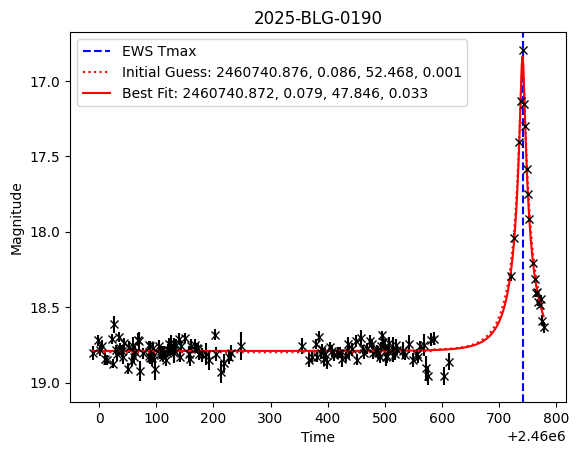

 111.47213940101454

 -----------------
Initial chi2: 214.02346835812782025-BLG-0190
Final chi2: 111.47213940101454
Delta chi2: -102.55132895711324
-----------------
t_0: 2460740.872
Delta chi2/dof: 
 -0.6253129814458125u_0: 0.079
-----------------

t_E: 47.846
rho: 0.033
-----------------
Time elapsed: 512.7953503131866 seconds
-----------------
FS: 8.09444830883929, FB: 11.122349123722056
chi2 =  381.5465239156497
-----------------
Initial chi2: 567.7767750993271
Final chi2: 381.5465239156497
Delta chi2: -186.2302511836774
Delta chi2/dof:  -1.302309448836905
-----------------

 2025-BLG-0251
-----------------
t_0: 2460743.816
u_0: 1.307
t_E: 10.098
rho: 0.001
-----------------
Time elapsed: 515.8620779514313 seconds
-----------------
FS: 70.68562381201941, FB: -34.17790461522328
chi2 =  231.15558145175163
-----------------
Initial chi2: 241.79558421377743
Final chi2: 231.15558145175163
Delta chi2: -10.640002762025802
Delta chi2/dof:  -0.04687225886354979
-----------------

 2025-BLG-

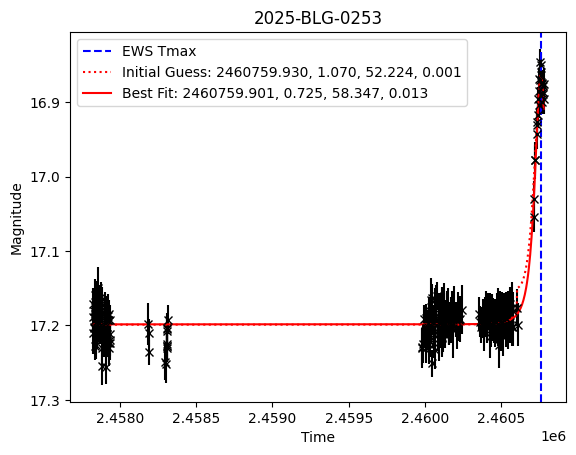


 2025-BLG-0253
-----------------
t_0: 2460759.901
u_0: 0.725
t_E: 58.347
rho: 0.013
-----------------
Time elapsed: 521.8134889602661 seconds
-----------------
FS: 47.35070908127622, FB: 35.93944076086954
chi2 =  173.78016166550407
-----------------
Initial chi2: 185.07767725367353
Final chi2: 173.78016166550407
Delta chi2: -11.29751558816946
Delta chi2/dof:  -0.04766884214417494
-----------------

 2025-DG-0001
-----------------
t_0: 2460726.661
u_0: 0.000
t_E: 58.330
rho: 0.001
-----------------
Time elapsed: 524.2520315647125 seconds

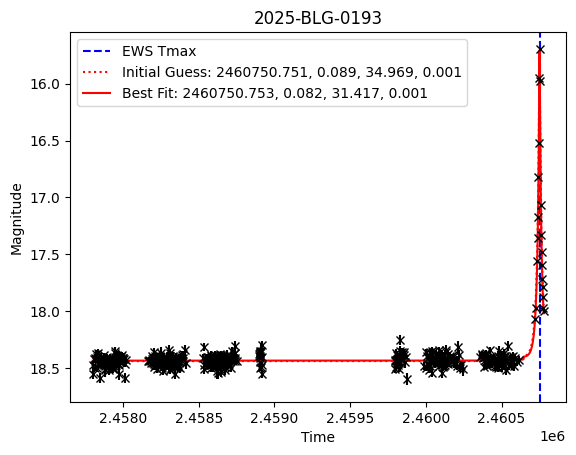


-----------------

FS: 6.4453135093406555, FB: 6.528187145172723 
2025-BLG-0193
-----------------chi2 =  
127.88167554217524t_0: 2460750.753

u_0: 0.082-----------------

Initial chi2: 129.90022388801907t_E: 31.417

Final chi2: 127.88167554217524rho: 0.001

Delta chi2: -2.0185483458438256
-----------------Delta chi2/dof: 
Time elapsed: 524.3626263141632 seconds 
-0.010194688615372857-----------------

-----------------FS: 27.09612889912461, FB: -0.41834692767932186

chi2 =  876.4009891205169
-----------------
Initial chi2: 2091.9064207619404
Final chi2: 876.4009891205169
Delta chi2: -1215.5054316414235
Delta chi2/dof:  -2.542898392555279
-----------------

 2025-BLG-0194
-----------------
t_0: 2460705.362
u_0: 0.000
t_E: 61.790
rho: 0.001
-----------------
Time elapsed: 526.9066412448883 seconds
-----------------
FS: 21.706688842787997, FB: 23.22566132058756
chi2 =  291.79583689179515
-----------------
Initial chi2: 296.44716687489176
Final chi2: 291.79583689179515
Delta chi2: -4.6513

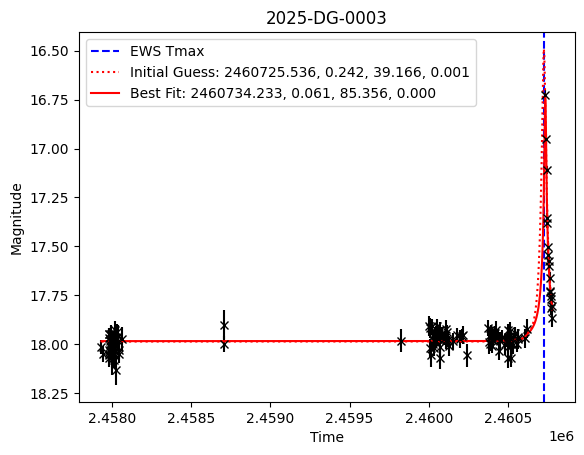


 2025-DG-0003
-----------------
t_0: 2460734.233
u_0: 0.061
t_E: 85.356
rho: 0.000
-----------------
Time elapsed: 530.5972139835358 seconds
-----------------
FS: 5.753394681538899, FB: 34.64219460001258
chi2 =  129.79598391369746
-----------------
Initial chi2: 161.29844389268004
Final chi2: 129.79598391369746
Delta chi2: -31.502459978982586
Delta chi2/dof:  -0.24611296858580145
-----------------

 2025-GD-0001
-----------------
t_0: 2460800.190
u_0: 0.005
t_E: 60.309
rho: 0.012
-----------------
Time elapsed: 534.2576568126678 seconds
-----------------
FS: 162.98313338437012, FB: -1.4196976184813015
chi2 =  372.07813366135076
-----------------
Initial chi2: 396.3384818188349
Final chi2: 372.07813366135076
Delta chi2: -24.260348157484145
Delta chi2/dof:  -0.0882194478453969
-----------------


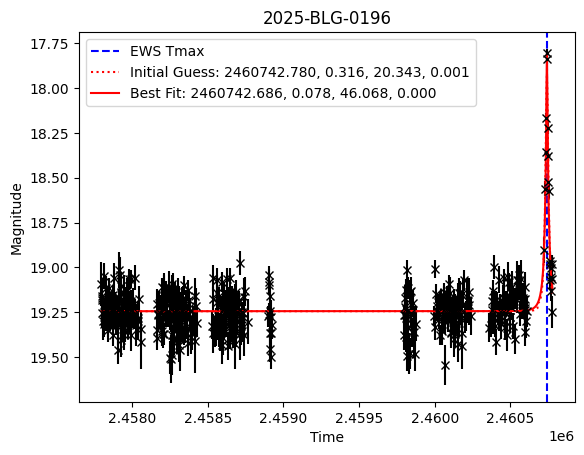


 2025-BLG-0196
-----------------
t_0: 2460742.686
u_0: 0.078
t_E: 46.068
rho: 0.000
-----------------
Time elapsed: 534.9792311191559 seconds
-----------------
FS: 2.9507301328952518, FB: 9.70006799622599
chi2 =  931.0780752511927
-----------------
Initial chi2: 1001.0845175858392
Final chi2: 931.0780752511927
Delta chi2: -70.00644233464652
Delta chi2/dof:  -0.14464140978232753
-----------------

 2025-GD-0002
-----------------
t_0: 2460706.580
u_0: 0.722
t_E: 61.915
rho: 0.001
-----------------
Time elapsed: 536.4024095535278 seconds
-----------------
FS: 61.82247361809039, FB: 65.38502506841769
chi2 =  359.5220460789991
-----------------
Initial chi2: 395.1054873942284
Final chi2: 359.5220460789991
Delta chi2: -35.58344131522932
Delta chi2/dof:  -0.0993950874727076
-----------------

 2025-BLG-0197
-----------------
t_0: 2460747.307
u_0: 0.606
t_E: 91.872
rho: 0.018
-----------------
Time elapsed: 538.4695920944214 seconds
-----------------
FS: 46.32000643414082, FB: 28.999526381749

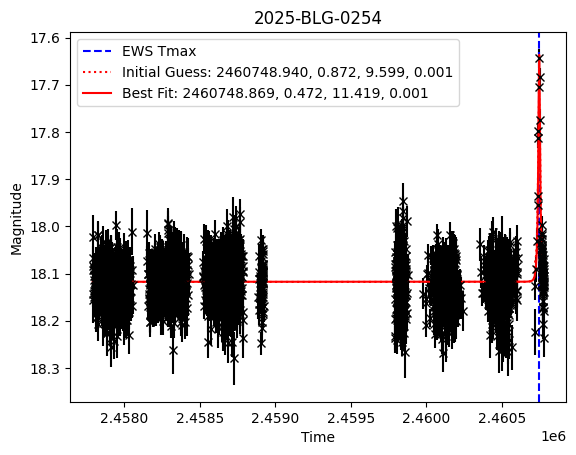


 2025-BLG-0254
-----------------
t_0: 2460748.869
u_0: 0.472
t_E: 11.419
rho: 0.001
-----------------
Time elapsed: 543.711341381073 seconds
-----------------
FS: 15.399310559730262, FB: 20.329171476994436
chi2 =  7060.383918887979
-----------------
Initial chi2: 7186.580579836087
Final chi2: 7060.383918887979
Delta chi2: -126.19666094810782
Delta chi2/dof:  -0.03279539005927958
-----------------

 2025-BLG-0198
-----------------
t_0: 2460750.259
u_0: 0.013
t_E: 45.052
rho: 0.000
-----------------
Time elapsed: 544.188325881958 seconds
-----------------
FS: 9.206417692309458, FB: 16.14342085905381
chi2 =  22920.82259045687
-----------------
Initial chi2: 29661.99911239354
Final chi2: 22920.82259045687
Delta chi2: -6741.176521936668
Delta chi2/dof:  -8.80049154299826
-----------------


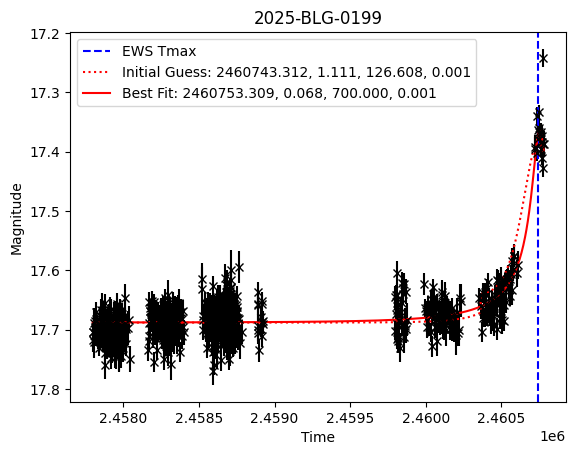


 2025-BLG-0199
-----------------
t_0: 2460753.309
u_0: 0.068
t_E: 700.000
rho: 0.001
-----------------
Time elapsed: 550.2117929458618 seconds
-----------------
FS: 1.3615103587816892, FB: 51.70673197553382
chi2 =  1492.117649002121
-----------------
Initial chi2: 1697.7212148665901
Final chi2: 1492.117649002121
Delta chi2: -205.60356586446915
Delta chi2/dof:  -0.27017551361953895
-----------------

 2025-BLG-0200
-----------------
t_0: 2460694.792
u_0: 0.000
t_E: 30.404
rho: 0.001
-----------------
Time elapsed: 555.1176035404205 seconds
-----------------
FS: 59.807104190692705, FB: 3.836844938183113
chi2 =  1383.4549655546462
-----------------
Initial chi2: 1394.396086488141
Final chi2: 1383.4549655546462
Delta chi2: -10.941120933494858
Delta chi2/dof:  -0.014396211754598497
-----------------

 2025-BLG-0201
-----------------
t_0: 2460747.235
u_0: 0.231
t_E: 101.325
rho: 0.000
-----------------
Time elapsed: 564.4217631816864 seconds
-----------------
FS: 3.5694406545819186, FB: 23.

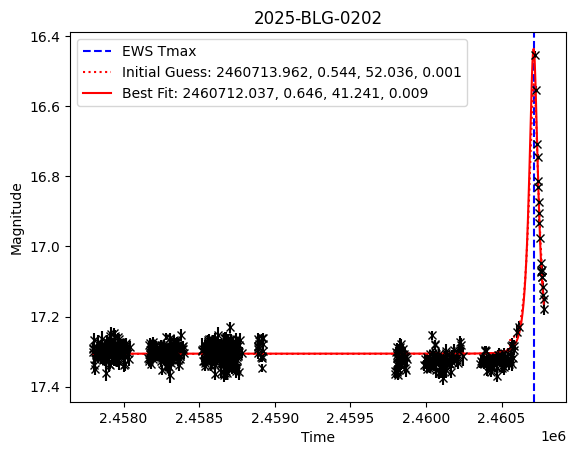


 2025-BLG-0202
-----------------
t_0: 2460712.037
u_0: 0.646
t_E: 41.241
rho: 0.009
-----------------
Time elapsed: 576.0624566078186 seconds
-----------------
FS: 118.77897977267995, FB: -43.33590755040934
chi2 =  1891.661104590805
-----------------
Initial chi2: 2104.773603343414
Final chi2: 1891.661104590805
Delta chi2: -213.11249875260887
Delta chi2/dof:  -0.2785784297419724
-----------------


Process ForkPoolWorker-1:
Process ForkPoolWorker-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/multiprocess/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.11/dist-packages/multiprocess/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.11/dist-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/multiprocess/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
                    ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/multiprocess/pool.py", line 48, in mapstar
    return list(map(*args))
           ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/pathos/help

KeyboardInterrupt: 

  File "/usr/local/lib/python3.11/dist-packages/MulensModel/magnificationcurve.py", line 227, in _set_point_lens_magnification_objects
    for method, selection in self.methods_indices.items():
                             ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/MulensModel/magnificationcurve.py", line 606, in <listcomp>
    out = [self._methods_names[value - 1]
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt
  File "/usr/local/lib/python3.11/dist-packages/MulensModel/magnificationcurve.py", line 623, in methods_indices
    methods = self.methods_for_epochs
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/MulensModel/magnificationcurve.py", line 606, in methods_for_epochs
    out = [self._methods_names[value - 1]
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [15]:
# Main function to parallelize the processing
def run_parallel_processing(plot_fraction=None, kill_after=None):
    # numpy array for the fit params
    fit_params = np.zeros((ews_df.shape[0], 3))

    if plot_fraction is None:
        plot_fraction = 0.1
    if kill_after is None:
        kill_after = 30

    start_time = time.time()

    # Create a pool of worker processes
    print(mp.cpu_count())
    with Pool(processes=mp.cpu_count()) as pool: # if running locally, keep the
                                                 # process count < mp.cpu_count()
                                                 # or it will be very slow
        results = pool.map(lambda i: process_event(i, ews_df, N*plot_fraction, start_time), range(kill_after))
        for i, params in results:
            fit_params[i] = params

    print("Total time:", time.time() - start_time)

    # Save fit_params if needed
    # np.save('fit_params.npy', fit_params)

    return fit_params

# Run the parallel processing function
fit_params = run_parallel_processing() # test run
#fit_params = run_parallel_processing(kill_after=ews_df.shape[0],
#                                     plot_fraction=0.01
#                                     ) # full run

#print(fit_params[:n_10])

In [ ]:
plt.close(99)
plt.figure(99)
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# t_0 values
min_t0 = min(fit_params[:, 0])
max_t0 = max(fit_params[:, 0])
print(min_t0, max_t0)
axes[0].hist(fit_params[:,0], bins=20)
axes[0].set_xlabel('t_0')
axes[0].set_ylabel('Frequency')
#log the y axis
axes[0].set_yscale('log')

# u0 values
min_u0 = min(fit_params[:, 1])
max_u0 = max(fit_params[:, 1])
print(min_u0, max_u0)
axes[1].hist(fit_params[:,1], bins=20)
axes[1].set_xlabel('u_0')
axes[1].set_ylabel('Frequency')
axes[1].set_yscale('log')

# tE values
min_tE = min(fit_params[:, 2])
max_tE = max(fit_params[:, 2])
print(min_tE, max_tE)
axes[2].hist(fit_params[:,2], bins=20)
axes[2].set_xlabel('t_E')
axes[2].set_ylabel('Frequency')
axes[2].set_yscale('log')

plt.show()

### <font face="Helvetica" size="5"> 3.4 Custom Event Finder </font>

If we weren,t borrowing initial fit parameters from the OGLE EWS, these fits would fail completely under downhill optimizers. Starting too far from the truth in parameter space means the optimizer gets trapped in local minima - the peaks and valleys of the likelihood landscape become a cage, not a guide.

We'll explore more robust (and computationally expensive) methods in the next section. But even with advanced samplers, having a good initial guess makes the entire process faster, more stable, and more scientifically honest.

Different ground-based surveys use different strategies to identify microlensing events in stellar light curves. You, however, have a luxury they don't: you already know which light curves contain events. That means your challenge isn't classification—it's localization.

And the most critical parameter to localize is $t_0$.  
Other parameters (like $u_0$, $t_\textrm{E}$, and $\rho$) can be guessed with population-based heuristics. But if your $t_0$ is wrong, your fit will miss the peak entirely - and what you get back will be noise-dressed nonsense.

This is the central problem in bulk fitting single-lens microlensing events:  
> We need an event-finding algorithm to guess $t_0$ accurately.

You now have:
- A full season of OGLE data
- Light curves that are guaranteed to contain events
- A set of academic papers describing common event-finding strategies:
  - a  
  - b  
  - c  

Do you think you can do better?

> **Exercise X**
>
> Write an algorithm to estimate $t_0$ for microlensing events.  
> Keep it simple. Keep it efficient.  
> The rest of your fit may depend on it.

In [ ]:
#@title Your code goes here

### <font face="Helvetica" size="5">3.4 Advanced Modeling Techniques and Higher-Order Models</font>

The idea that a good $t_0$ guess is enough for a good fit holds true for FSPL events. But when an FSPL model fails to fit cleanly, that's often a sign that higher-order effects are at play. You've encountered some of these in other chapters of this course.

We know that binary stars are common in the galaxy. And yet, we often model events using PSPL or FSPL, as if single-lens-single-source events are the default. In fact, recent simulations of ground-based surveys using modern Galactic models suggest that around 50% of single-peaked microlensing events are actually "hidden binaries"—either:
- **Binary lenses** (multiple objects in the lens system), or  
- **Binary sources** (two source stars lensed simultaneously).

#### <font face="Helvetica" size="4"> Binary source stars </font>
They introduce subtle distortions to the light curve and can easily masquerade as single-lens, binary-lens events.  

If you'd like to learn more, see our [notebook on binary sources](https://github.com/AmberLee2427/TheMicrolensersGuideToTheGalaxy/blob/main/Notebooks/BinarySource.ipynb).

#### <font face="Helvetica" size="4"> Binary lenses </font>
These are a different beast entirely. They require:
- Higher-order models
- Optimizers that can escape local minima (e.g. Monte Carlo methods that allow uphill steps)
- Often a grid search in $s$, $q$, and $\rho$ to even get reasonable initial conditions

Even with that, **degeneracies are common** — and easy to miss. For example, see the modeling of OGLE-2016-BLG-1195 (Shartzvald et al., 2017; Bond et al., 2017; Gould et al., 2023; Vandorou et al., 2024), where a viable degenerate solutions were overlooked at each stage of modelling.

If a light curve shows dramatic deviations from a Paczyński shape, you're almost certainly dealing with a binary lens (unless some other astrophysical event has contaminated your lightcurve). But determining the *correct* model requires balancing:
- Evidence for complexity, and  
- The principle of parsimony (Occam's Razor), while knowing full well that these “complex” models are not rare.

---

For more on Bayesian modeling and MC methods in microlensing, see our [modeling notebook](https://github.com/AmberLee2427/TheMicrolensersGuideToTheGalaxy/blob/main/Notebooks/Modelling.ipynb).

---

#### Other higher-order effects not covered in this course (but worth knowing):
- Lens orbital motion  
- Xallarap (source orbital motion)  
- Multiple lenses (e.g. triple lenses)  
- Variable stars (source, lens, or blend with intrinsic variability)  
- Variable blending (ambient stars moving in/out of aperture/PSF)  
- General data systematics  



## <font face="Helvetica" size="6"> 4. Full Season Roman Fit </font>
<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">

First, the data. There is a repo full of Roman-like light curves from the 2018 WFIRST Data Challenge. We start our mini data challenge by cloning that and pulling out all the relavent lightcurves. Feel free to blindly `SHFT` + `ENTR` your way through this part until you get to Section 4.2.

### <font face="Helvetica" size="5"> 4.1 Getting the data </font>

In [ ]:
# clone the microlensing data challenge repo
!git clone https://github.com/microlensing-data-challenge/data-challenge-1.git

# Extract the lightcurve files
!tar -xzvf data-challenge-1/lc.tar.gz -C data-challenge-1/


In [ ]:
#from IPython.display import IFrame
#
## Assuming the PDF is in the current working directory
#pdf_path = "data-challenge-1/Answers/DataChallenge2019_Summary_byJenniferYee.pdf"
#
## Display the PDF using IFrame
#IFrame(pdf_path, width=800, height=600)

This dataset includes 293 lightcurve, 74 of which are single lens events. We can cheat a little and specifically pull out the events that we know to be single lenses, keeping the challenge tractable for completion within the hour, with the added benefit of making the strangley organized `master_file.txt` easier to wrangle.

In [ ]:
master_file = '/content/data-challenge-1/Answers/master_file.txt'
header_file = '/content/data-challenge-1/Answers/wfirstColumnNumbers.txt'

rows = []
with open(master_file, "r") as f:
    for line in f:
        line = line.strip()
        # Skip empty lines or comment lines
        if not line or line.startswith("#"):
            continue

        tokens = line.split()  # split on whitespace
        # Keep only single-lens events
        if "dcnormffp" not in tokens:
            continue

        # Single-lens lines should have exactly 96 columns
        if len(tokens) != 96:
            continue

        rows.append(tokens)

df_sl = pd.DataFrame(rows)

# make an array of zeros with 97 elements
colnames_96 = np.zeros(96, dtype=object)

# Read the header file
with open(header_file, 'r') as f:
    for line in f:
        line = line.strip()
        # Skip empty lines or comments
        if not line or line.startswith('#'):
            continue
        # The second token is the 'name'
        parts = line.split()
        colnames_96[int(parts[0])] = parts[1]

#For single lenses they are (***Note for these, the mass of the lens is given by the planet mass column, not the host mass column):
#72 - unimportant
#73 - N, number of consecutive W149 data points deviating by >=3 sigma from a flat line
#74 - unimportant
#75 - Delta chi^2 (relative to a flat line)
#76-91 - unimportant
#92 - simulated event type (dcnormffp = single lens or free-floating planet)
#93 - unimportant (I think)
#94 - lightcurve filename root
#95 - Data challenge lightcurve number

# Replace the column names in colnames_96
colnames_96[73] = 'N'
colnames_96[75] = 'Delta chi2'
colnames_96[92] = 'sim type'
colnames_96[94] = 'filename'
colnames_96[95] = 'lc_number'

# Make sure the column names are unique
for i in range(94):
    if colnames_96[i] == '|' or colnames_96[i] == 0:
        colnames_96[i] = 'col_' + str(i)

# Replace the column names in the data_frame
df_sl.columns = colnames_96

# Remove the dummy columns 'col_*'
df_sl = df_sl.loc[:, ~df_sl.columns.str.startswith('col_')]

df_sl


The last column in this data frame has the lightcurve number, which we can use to pick out just single-lens lightcurves for analysis.

In [ ]:
lc_number = df_sl['lc_number'].to_numpy()

lc_file_path_format = 'data-challenge-1/lc/ulwdc1_XXX_filter.txt'

lc_file_paths_W149 = [lc_file_path_format.replace('filter', 'W149')] * len(lc_number)
lc_file_paths_Z087 = [lc_file_path_format.replace('filter', 'Z087')] * len(lc_number)

# replace XXX, from the right, with the lc_number which is not necessarily of length 3
lc_file_paths_W149 = [path.replace('XXX', str(num).zfill(3)) for path, num in zip(lc_file_paths_W149, lc_number)]
lc_file_paths_Z087 = [path.replace('XXX', str(num).zfill(3)) for path, num in zip(lc_file_paths_Z087, lc_number)]

df_sl['lc_file_path_W149'] = lc_file_paths_W149
df_sl['lc_file_path_Z087'] = lc_file_paths_Z087

df_sl

There are a few pieces of information that may need to be known for each event that are not in the lightcurve files. These are stored in event_info.txt

Columns: `"Event_name"` `"Event_number"` `"RA_(deg)"` `"Dec_(deg)"` `"Distance"` `"A_W149"` `"sigma_A_W149"` `"A_Z087"` `"sigma_A_Z087"`

Distance, A_W149/Z087 are an estimate of the distance and extinction in each band of the red clump stars. sigma_A_W149/Z087 are dispersions in the extinction.

In [ ]:
header = ["Event_name",
          "Event_number",
          "RA_(deg)",
          "Dec_(deg)",
          "Distance",
          "A_W149",
          "sigma_A_W149",
          "A_Z087",
          "sigma_A_Z087"
]

event_info = pd.read_csv('./data-challenge-1/event_info.txt', names=header, delim_whitespace=True)
event_info

In [ ]:
# Convert 'lc_number' to numeric type before merging
merged_df = pd.merge(event_info, df_sl.astype({'lc_number': 'int64'}), left_on='Event_number', right_on='lc_number', how='inner')
merged_df

Great - data successfully wrangled. Let's forget we ever had to live through that and move right along.

### <font face="Helvetica" size="5"> 4.2 Adjusting the model for L2 an orbit </font>

Next, we need to make a minor adjustment to our model for data that is not ground based.

In [ ]:
# Here is the main difference - we provide the ephemeris for Roman:
DATA_PATH = lc_file_paths_W149[0]

file_Roman_eph_W149 = join(
    mm.DATA_PATH, 'W149_ephemeris_files', 'wfirst_ephemeris_W149.txt')
file_Roman_eph_W149 = join(
    mm.DATA_PATH, 'W149_ephemeris_files', 'wfirst_ephemeris_W149.txt')
data_Roman_W149 = mm.MulensData(
    file_name=, ephemerides_file=file_spitzer_eph,
    plot_properties={'label': 'Roman W149'})

data_object = MulensModel.MulensData(
    data_list=[times, mags, errors],
    phot_fmt='mag',  # or 'flux' – confirm
    bandpass='H',    # or whatever Roman used in your sim
    plot_properties={
        'color': 'navy',
        'label': 'Roman Sim',
        'marker': 'o',
        'markersize': 2
    }
)

# the new model
Roman_model = mm.Model({**params}, coords=coords,
                       ephemerides_file=file_spitzer_eph)

### <font face="Helvetica" size="5"> 4.3 Do it </font>

This is it. You have every thing you need to fit a full season of single lens. And this is the part where we push the baby bird out of the nest. No more hand-holding. No sample answers. Just do it.

I believe in you.

> **Exercise X**
>
> Perform FSPL on the provided simulated Roman single-lens events.
>
> *Note. Don't forget to save you best fit parameters for later inspection.

In [ ]:
#@title Your code goes here

### <font face="Helvetica" size="5"> 4.4 How did you do? </font>

The next step is evalutaing how well your bulk fit went. Some simple histograms of model parameters, should do the trick.

> **Exercise X**
>
> Make overlayed histograms of the true parameters distributions and your best-fit parameter distributions to evaluate the sucess of your algoryhthms.

In [ ]:
#@title Your code goes here

<!-- ## <font face="Helvetica" size="6"> 5. Meta Analysis </font>*italicized text*
<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">

Your full season fit is probably going to take some serious timme to finish, so we have included this section purely as a homework exercise. -->

Well done for completing this notebook. If you enjoyed the challenge or feel like you would like to try to improve your approach - if you think you can do better than the current microlensing fitting approaches - look out for the Roman Microlensing Data Challenge comming out in September.